# Etude Statistique

Problématique: Prédiction des entrées dans les cinémas français

Auteur:
- Boukharfien Zainab
- Houssoy Adrien
- Hurdebourcq Paul

Contexte: Nous cherchons à prédire le nombre d'entrées d'un cinéma sur l'année 2020 à l'aide de différentes variables caractéristiques.


## Installation et découverte de l'environement de travail

### Importations des bibliothèques

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

### Importation des données

In [4]:
data=pd.read_csv("../cinematographiques-propre.csv",sep=';',encoding='ANSI')
data.head()

,N° auto,nom,région administrative,adresse,code INSEE,commune,population de la commune,DEP,N°UU,unité urbaine,...,nombre de films en semaine 1,PdM en entrées des films français,PdM en entrées des films américains,PdM en entrées des films européens,PdM en entrées des autres films,films Art et Essai,PdM en entrées des films Art et Essai,latitude,longitude,geolocalisation
0,55,ELYSEES LINCOLN,ILE-DE-FRANCE,14 RUE LINCOLN,75108,Paris 8e Arrondissement,36694,75,851,Paris,...,53,"48,82847702","5,617302493","26,36427356","19,18994693",61,"87,62891759","48,870512","2,303157","48,870512,2,303157"
1,204,UGC OPERA,ILE-DE-FRANCE,32 BD DES ITALIENS,75109,Paris 9e Arrondissement,59408,75,851,Paris,...,41,"47,16468714","42,30156431","10,49210603","0,041642526",33,"53,34226535","48,871332","2,335302","48,871332,2,335302"
2,301,MAX LINDER,ILE-DE-FRANCE,24 BD POISSONNIERE,75109,Paris 9e Arrondissement,59408,75,851,Paris,...,8,"6,97058738","49,98399907","35,58607046","7,459343089",64,"53,67294097","48,871363","2,344886","48,871363,2,344886"
3,451,UGC MONTPARNASSE,ILE-DE-FRANCE,83 BD DU MONTPARNASSE,75106,Paris 6e Arrondissement,42428,75,851,Paris,...,63,"43,58109209","38,32192339","15,69030155","2,406682967",45,"39,64221679","48,84351","2,325646","48,84351,2,325646"
4,731,MK2 ODEON COTE SAINT-GERMAIN,ILE-DE-FRANCE,113 BD ST GERMAIN,75106,Paris 6e Arrondissement,42428,75,851,Paris,...,58,"55,90664627","24,3213105","13,33991217","6,43213105",48,"68,84195984","48,852437","2,338266","48,852437,2,338266"


### Présentation du jeu de données

In [5]:
print(f"Nombre de cinéma étudiées: {data.shape[0]}")
print(f"Nombre de caractéristiques (variable): {data.shape[1]}")

Nombre de cinéma étudiées: 2042
Nombre de caractéristiques (variable): 40


Le jeu de données dont nous disposons regroupe l'activité des cinémas français en 2020. Nous disposons d'une liste de 2042 cinéma et de 40 variables caractéristiques sur les performances du cinéma.
Les variables sont les suivantes:

- N° auto = Identifiant du cinéma
- nom = Nom du cinéma
- région administrative = Nom de la région
- adresse = Adresse du cinéma
- code INSEE = code insee du cinéma
- commune = Commune du cinéma
- population de la commune = Population de la commune du cinéma
- DEP = Numéro de département
- N°UU = Numéro de l'unité urbaine du cinéma
- unité urbaine = Unité urbaine du cinéma
- population unité urbaine = Population de l'unité urbaine du cinéma
- situation géographique = Localisation du cinéma
- écrans = Nombre d'écran dans le cinéma
- fauteuils = Nombre de fauteuils dans le cinéma
- semaines d'activité = Nombres de semaines où le cinéma a été ouvert
- séances = Nombre de séance du cinéma
- entrées 2020 = Nombres d'entrées en 2020
- entrées 2019 = Nombre d'entrée en 2019
- évolution entrées = Evolution des entrées entre 2019 et 2020
- tranche d'entrées = tranche du nombre d'entrée en 2020
- propriétaire = Nom du propriétaire du cinéma
- programmateur = Nom du programmateur des films diffusées
- AE = appartenance à la catégorie art et essai
- catégorie Art et Essai = catégorie des films art et essais
- label Art et Essai = label des film art et essai
- genre = mobilité du cinéma (fixe ou itinérant)
- multiplexe = appartenance à un multiplexe (oui/non)
- zone de la commune = zone de la comune du cinéma
- nombre de films programmés = Nombre de film programmé par le cinéma
- nombre de films inédits = nombre de film inédit diffusé
- nombre de films en semaine 1 = nombre de film en semaine 1 diffusé
- PdM en entrées des films français = part de marché des films français dans le cinéma
- PdM en entrées des films américains = part de marché des films américains dans le cinéma
- PdM en entrées des films européens = part de marché des films européens dans le cinéma
- PdM en entrées des autres films = part de marché des autres films dans le cinéma
- films Art et Essai = nombre de film art et essaie diffusé
- PdM en entrées des films Art et Essai = part de marché des films art et essai dans le cinéma
- latitude = latitude geographique du cinéma
- longitude = longitude geographqiue du cinéma
- geolocalisation = coordonnées geographique du cinéma



 ## Analyse exploiratoire

### Pré-traitement

Nous allons d'abord vérifier si il n'y a pas de valeur manquante dans notre jeu de données.

Valeurs manquantes par caractéristique :
 N° auto                                     0
nom                                         0
région administrative                       0
adresse                                     1
code INSEE                                  0
commune                                     0
population de la commune                    0
DEP                                         0
N°UU                                        0
unité urbaine                               0
population unité urbaine                    0
situation géographique                      0
écrans                                      0
fauteuils                                   0
semaines d'activité                         0
séances                                     0
entrées 2020                                0
entrées 2019                                0
évolution entrées                           1
tranche d'entrées                           0
propriétaire                          

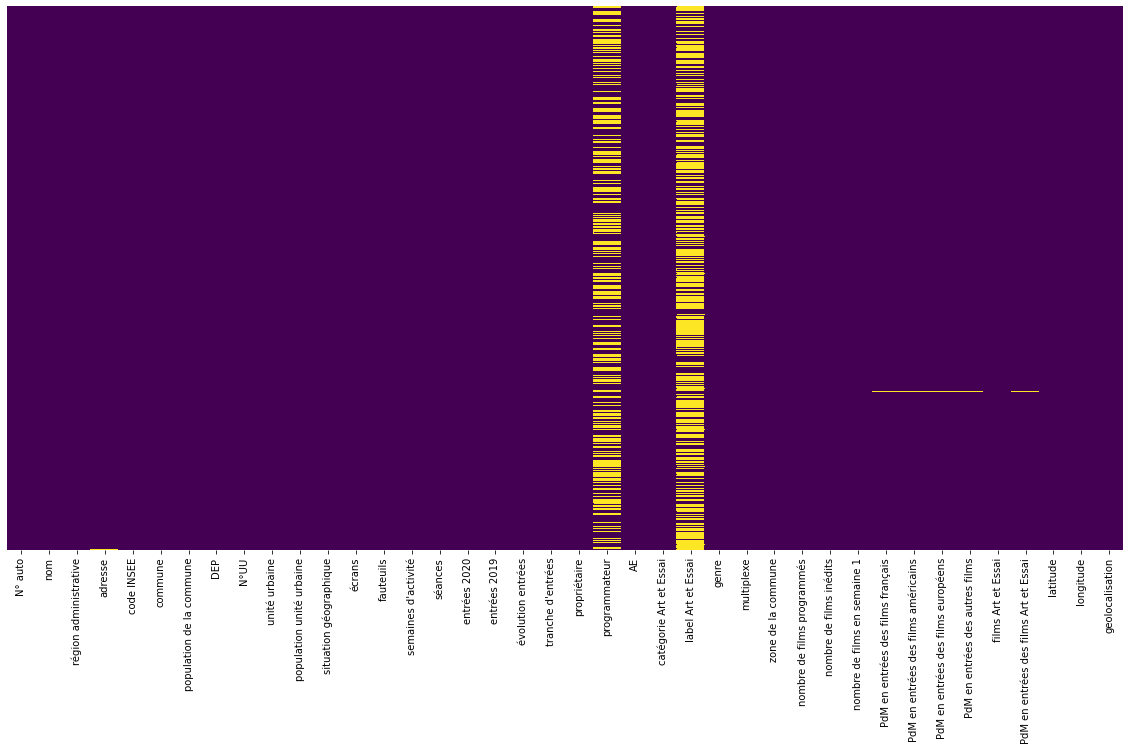

In [6]:
# Traitement des valeurs manquantes (vérification si elles existent).
missing_values = data.isnull().sum()
print("Valeurs manquantes par caractéristique :\n", missing_values)

plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

On remarque que les colonnes "label Art et Essai" et "programmateur" contiennent beaucoup de valeur manquantes (respectivement 1192 et 854). Ensuite, nous avons aussi d'autre variable comme les part de marché qui possèdent des valeur manquantes.
Pour éviter de polluer notre modèle, nous allons:
- supprimer la colonne "label Art et Essai" car plus de 50% des valeurs de la colonnes sont manquantes
- remplacer les valeurs manquantes des variables numérique par la médiane ou la moyenne
- remplacer les valeurs manquantes des variables "programmateur" avec un algorithme KNN
- supprimer la ligne avec l'adresse manquante car cela ne sera pas cohérents d'inventer 1 adresse ou de créer une adresse fictive qui pourrai fausser les résultats.

In [7]:
# suppression de la colonne "label Art et Essai"
data=data.drop(columns=['label Art et Essai'],axis=1)
# suppression de la ligne avec l'adresse null
data=data[data['adresse'].notna()]

#Vérification des suppressions
data.shape

(2041, 39)

#### Convertion des données

Avant de commencer à remplacer nos valeur manquantes, nous allons convertir nos données dans le type adéquats (texte, entier et décimal)

In [8]:
def convertion(df, typ, *var):
    """
    Fonction qui modifie le type des variables
    
    : param list data : les donnees
    : return : les data avec le bon type pour chaque var
    : rtype : list
    """
    types = ["str","int","float"]
    while typ not in types:
        typ = input("Type non reconnu, merci de choisir entre \"str\", \"int\" ou \"float\" \n►")
    for ele in var:
        if typ == "float" and "float" not in str(df[ele].dtype):
            df[ele] = df[ele].str.replace(",",".")
            df[ele] = df[ele].astype("float")
        elif typ not in str(df[ele].dtype):
            df[ele] = df[ele].astype(str(typ))
    return df

In [9]:
data = convertion(data, "str", 'N° auto','nom','adresse','région administrative','commune','code INSEE', 'DEP', 'unité urbaine', 'propriétaire','AE', 'catégorie Art et Essai','genre','multiplexe','geolocalisation',"programmateur")
data = convertion(data, "int", 'population de la commune','population unité urbaine','écrans', 'fauteuils', "semaines d'activité",'séances','entrées 2020','entrées 2019', 'nombre de films programmés','nombre de films inédits','nombre de films en semaine 1')
data = convertion(data, "float", 'évolution entrées', 'PdM en entrées des films français', 'PdM en entrées des films américains', 'PdM en entrées des films européens', 'PdM en entrées des autres films', 'PdM en entrées des films Art et Essai')

In [10]:
for col in data.columns:
    if "object" in str(data[col].dtype):
        print(f"{col}: texte")
    elif "int" in str(data[col].dtype):
        print(f"{col}: Entier")
    elif "float" in str(data[col].dtype):
        print(f"{col}: décimal")

N° auto: texte
nom: texte
région administrative: texte
adresse: texte
code INSEE: texte
commune: texte
population de la commune: Entier
DEP: texte
N°UU: texte
unité urbaine: texte
population unité urbaine: Entier
situation géographique: texte
écrans: Entier
fauteuils: Entier
semaines d'activité: Entier
séances: Entier
entrées 2020: Entier
entrées 2019: Entier
évolution entrées: décimal
tranche d'entrées: texte
propriétaire: texte
programmateur: texte
AE: texte
catégorie Art et Essai: texte
genre: texte
multiplexe: texte
zone de la commune: texte
nombre de films programmés: Entier
nombre de films inédits: Entier
nombre de films en semaine 1: Entier
PdM en entrées des films français: décimal
PdM en entrées des films américains: décimal
PdM en entrées des films européens: décimal
PdM en entrées des autres films: décimal
films Art et Essai: Entier
PdM en entrées des films Art et Essai: décimal
latitude: texte
longitude: texte
geolocalisation: texte


#### Imputation des valeurs manquantes

##### Variables qualitatives

Nous avons remarqué que la variable programmateur contenait beaucoup de valeurs manquantes. Nous avons donc décider de remplacer ces valeurs nulles à l'aide d'un algorithmes KNN qui va déterminer notre programmateur par rapport au 5 plus proche voisin.

In [11]:
#Encodage de la variable
le=LabelEncoder()
data["programmateur_encoded"]=le.fit_transform(data["programmateur"])
data.loc[data['programmateur'] == 'nan', 'programmateur_encoded'] = np.nan

#Imputation
imputer=KNNImputer(n_neighbors=5)
data["programmateur_encoded"]=imputer.fit_transform(np.array([data["programmateur_encoded"]]).reshape(-1,1))
data["programmateur_encoded"]=round(data["programmateur_encoded"],0)
data['programmateur'] = le.inverse_transform(data['programmateur_encoded'].astype("int"))
data=data.drop(columns=["programmateur_encoded"],axis=1)

##### Variables quantitatives

Nous avons remarqué que les variables ci-dessous possédait des valeurs manquantes. Etant des variables de types numérique, nous avons choisi de remplacer les valeurs nulles par la médiane de cette variable.

In [12]:
missing_values2=data.isnull().sum()
var_miss=list(missing_values2[missing_values2!=0].index)


In [13]:
for v in var_miss:
    print(v)
    data[v] = data[v].fillna(data[v].median())


évolution entrées
PdM en entrées des films français
PdM en entrées des films américains
PdM en entrées des films européens
PdM en entrées des autres films
PdM en entrées des films Art et Essai


Valeurs manquantes par caractéristique :
 N° auto                                  0
nom                                      0
région administrative                    0
adresse                                  0
code INSEE                               0
commune                                  0
population de la commune                 0
DEP                                      0
N°UU                                     0
unité urbaine                            0
population unité urbaine                 0
situation géographique                   0
écrans                                   0
fauteuils                                0
semaines d'activité                      0
séances                                  0
entrées 2020                             0
entrées 2019                             0
évolution entrées                        0
tranche d'entrées                        0
propriétaire                             0
programmateur                            0
AE          

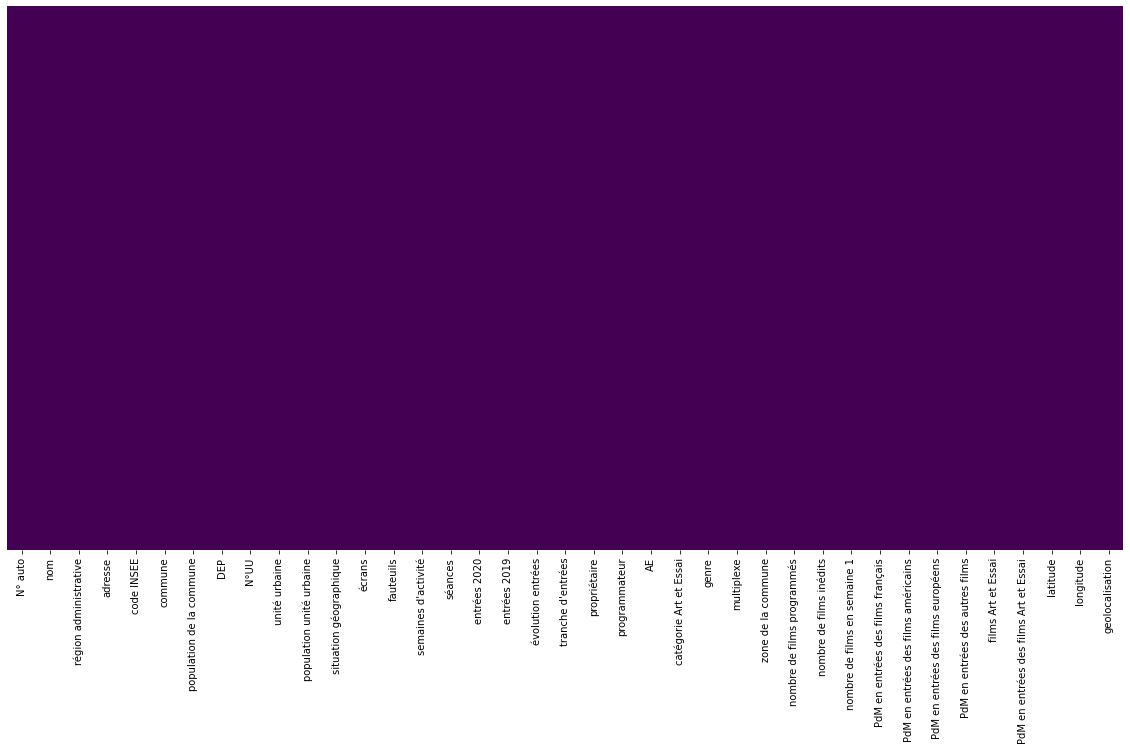

In [14]:
# Traitement des valeurs manquantes (vérification si elles existent).
missing_values = data.isnull().sum()
print("Valeurs manquantes par caractéristique :\n", missing_values)

plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Analyse 

Dans cette partie, nous allons voir comment se comportent les variables de notre dataset. Nous allons d'abord les étuditer une part une, puis nous allons regarder les comparer entre afin de voir si certaines variables sont corrélées entre elles. 

#### Analyse univarié

Commençons par trier nos variables. Nous allons mettre d'un côté les variables qualitatives et de l'autre les variables quantitatives. Cette sépartation va nous permettre d'adapter nos analyses.

In [15]:
def tri_var(df):
  """
  Fonction qui sépare les variables qualitatives et quantitatives
  Param: 
    - data (Dataframe): jeu de données initial
  Return:
    - quali (liste) : liste des variables qualitatives
    - quanti (liste) :  liste des variables quantitatives
  """
  quanti=[]
  quali=[]
  df_col=df.columns
  for i in df_col:
    if 'float' in str(df[i].dtypes) or "int" in str(df[i].dtype):
      quanti.append(i)
    else:
      quali.append(i)

  return quali,quanti

In [16]:
var_quali, var_quanti = tri_var(data)
print("Variables qualitatives : ")
for v in var_quali:
    print(f"\t{v}")

print("\n")

print("Variables quantitatives : ")
for v in var_quanti:
    print(f"\t{v}")

Variables qualitatives : 
	N° auto
	nom
	région administrative
	adresse
	code INSEE
	commune
	DEP
	N°UU
	unité urbaine
	situation géographique
	tranche d'entrées
	propriétaire
	programmateur
	AE
	catégorie Art et Essai
	genre
	multiplexe
	zone de la commune
	latitude
	longitude
	geolocalisation


Variables quantitatives : 
	population de la commune
	population unité urbaine
	écrans
	fauteuils
	semaines d'activité
	séances
	entrées 2020
	entrées 2019
	évolution entrées
	nombre de films programmés
	nombre de films inédits
	nombre de films en semaine 1
	PdM en entrées des films français
	PdM en entrées des films américains
	PdM en entrées des films européens
	PdM en entrées des autres films
	films Art et Essai
	PdM en entrées des films Art et Essai


##### Analyse des variables quantitatives

In [17]:
def analyse_quanti(var,v,lst_transfo):
    """
    Fonction qui permet d'analyser de manière univarié les variables quantitatives
    Param:
        var: series statistique de la variable étudiés
        v: nom de la variable
        lst_transo: liste des variables à transformer
    Return: 
        lst_transfo: liste des variables à transformer
    """
    print(f"########################## Analyse de {v} ##########################")
    plt.figure(figsize=(12, 4))

    # Histogramme + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(var, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {v}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=var, color='lightcoral')
    plt.title(f'Boxplot de {v}')

    plt.tight_layout()
    plt.show()

    #Stats
    print("-------------------------------------")
    print("STATISTIQUES DESCRIPTIVES")
    print("-------------------------------------")
    print("La valeur minimum est : ", var.min())
    print("La valeur maximum est  : ", var.max())
    print(f"La moyenne de cette variable est : ", var.mean())
    print("Ecart-type : ", var.std(),f". \n C'est à dire que les valeurs sont écarté d'environ {var.std()} autour de la moyenne")
    print("Q1 ", var.quantile(0.25),f"\n C'est à dire que 25% des valeurs sont inférieur à {var.quantile(0.25)}.")
    print("Q2 : ", var.median(),f"\n C'est à dire que 50% des valeurs sont inférieur à {var.median()}.")
    print("Q3: ", var.quantile(0.75),f"\n C'est à dire que 75% des valeurs sont inférieur à {var.quantile(0.75)}.")
    print("Ecart interquartile :", var.quantile(0.75) - var.quantile(0.25),f"\n C'est à dire que 50% des valeurs sont comprise entre {var.quantile(0.25)} et {var.quantile(0.75)}.")

    print("\n-------------------------------------")
    print("QUANTILES EXTREMES")
    print("-------------------------------------")
    print("1% ", var.quantile(0.01))
    print("5% ", var.quantile(0.05))
    print("95% ", var.quantile(0.95))
    print("99% ", var.quantile(0.99))

    # Détection des valeurs aberrantes
    # Skewness
    skewness = skew(var)
    print("\n-------------------------------------")
    print("ASYMETRIE")
    print("-------------------------------------")
    print(f"Skewness de {v} : {skewness:.3f}")
    
    # Conseil en fonction de la skewness
    if skewness > 1:
        print("Distribution très asymétrique à droite. Une transformation log peut être envisagée.")
    elif skewness < -1:
        print("Distribution très asymétrique à gauche. Une transformation en racine carrée ou cube peut être testée.")
    elif abs(skewness) < 0.5:
        print("Distribution assez symétrique.")
    else:
        print("Distribution modérément asymétrique.")
    

    # Détection des outliers (règle des 1.5*IQR)
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = var[(var < lower_bound) | (var > upper_bound)]

    # Conseil en fonction des outliers
    if len(outliers) > 0:
        print(f"{len(outliers)} valeurs aberrantes détectées pour {v}.")
    else:
        print(f"Aucune valeur aberrante détectée pour {v}.")

    if (skewness >1 or skewness<-1) and len(outliers)>0:
        lst_transfo.append(v)

    print("#" * 70,'\n')
    
    return lst_transfo

########################## Analyse de population de la commune ##########################


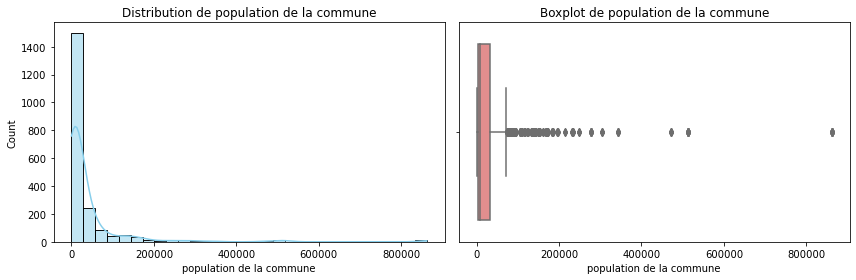

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  106
La valeur maximum est  :  861635
La moyenne de cette variable est :  38992.178833904945
Ecart-type :  95246.01244019452 . 
 C'est à dire que les valeurs sont écarté d'environ 95246.01244019452 autour de la moyenne
Q1  3896.0 
 C'est à dire que 25% des valeurs sont inférieur à 3896.0.
Q2 :  9651.0 
 C'est à dire que 50% des valeurs sont inférieur à 9651.0.
Q3:  31809.0 
 C'est à dire que 75% des valeurs sont inférieur à 31809.0.
Ecart interquartile : 27913.0 
 C'est à dire que 50% des valeurs sont comprise entre 3896.0 et 31809.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  341.0
5%  1048.0
95%  160649.0
99%  513275.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de population de la commune : 5.669
Distribution très asymétrique à droite. Une transformati

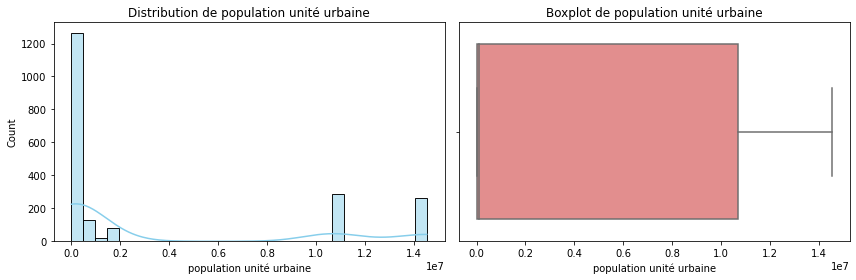

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1951
La valeur maximum est  :  14541106
La moyenne de cette variable est :  3525742.5017148457
Ecart-type :  5554826.479791404 . 
 C'est à dire que les valeurs sont écarté d'environ 5554826.479791404 autour de la moyenne
Q1  9835.0 
 C'est à dire que 25% des valeurs sont inférieur à 9835.0.
Q2 :  91281.0 
 C'est à dire que 50% des valeurs sont inférieur à 91281.0.
Q3:  10706072.0 
 C'est à dire que 75% des valeurs sont inférieur à 10706072.0.
Ecart interquartile : 10696237.0 
 C'est à dire que 50% des valeurs sont comprise entre 9835.0 et 10706072.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  2376.6
5%  3496.0
95%  14541106.0
99%  14541106.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de population unité urbaine : 1.139
Distribution très asymétrique à dr

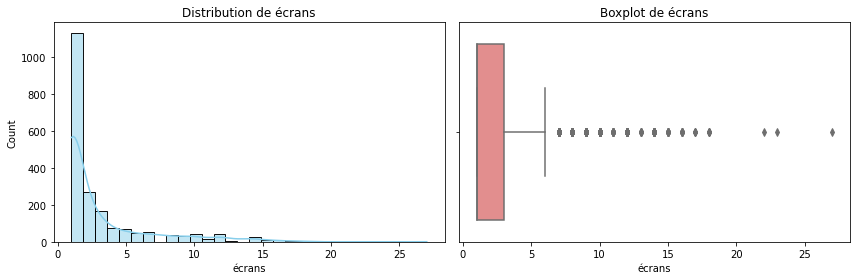

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1
La valeur maximum est  :  27
La moyenne de cette variable est :  3.0019598236158744
Ecart-type :  3.517602247124237 . 
 C'est à dire que les valeurs sont écarté d'environ 3.517602247124237 autour de la moyenne
Q1  1.0 
 C'est à dire que 25% des valeurs sont inférieur à 1.0.
Q2 :  1.0 
 C'est à dire que 50% des valeurs sont inférieur à 1.0.
Q3:  3.0 
 C'est à dire que 75% des valeurs sont inférieur à 3.0.
Ecart interquartile : 2.0 
 C'est à dire que 50% des valeurs sont comprise entre 1.0 et 3.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1.0
5%  1.0
95%  12.0
99%  15.599999999999909

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de écrans : 2.244
Distribution très asymétrique à droite. Une transformation log peut être envisagée.
284 valeurs aberrantes dét

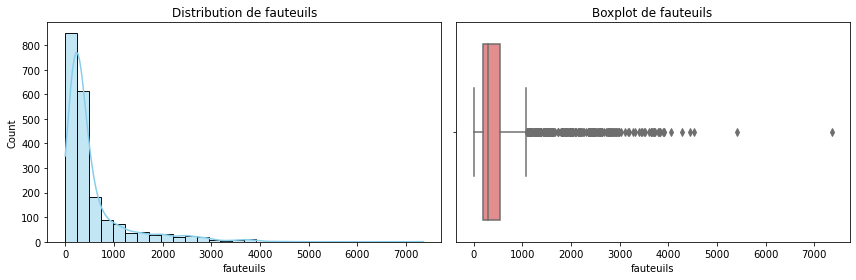

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  7358
La moyenne de cette variable est :  557.8294953454189
Ecart-type :  711.8306441928096 . 
 C'est à dire que les valeurs sont écarté d'environ 711.8306441928096 autour de la moyenne
Q1  187.0 
 C'est à dire que 25% des valeurs sont inférieur à 187.0.
Q2 :  288.0 
 C'est à dire que 50% des valeurs sont inférieur à 288.0.
Q3:  549.0 
 C'est à dire que 75% des valeurs sont inférieur à 549.0.
Ecart interquartile : 362.0 
 C'est à dire que 50% des valeurs sont comprise entre 187.0 et 549.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  100.0
95%  2200.0
99%  3578.7999999999925

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de fauteuils : 2.941
Distribution très asymétrique à droite. Une transformation log peut être envisagée.


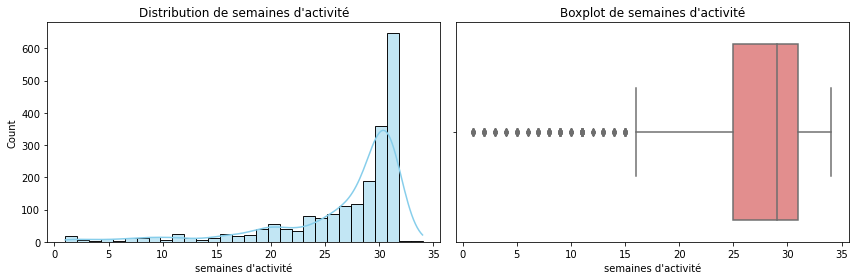

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1
La valeur maximum est  :  34
La moyenne de cette variable est :  26.66780989710926
Ecart-type :  6.276503612924882 . 
 C'est à dire que les valeurs sont écarté d'environ 6.276503612924882 autour de la moyenne
Q1  25.0 
 C'est à dire que 25% des valeurs sont inférieur à 25.0.
Q2 :  29.0 
 C'est à dire que 50% des valeurs sont inférieur à 29.0.
Q3:  31.0 
 C'est à dire que 75% des valeurs sont inférieur à 31.0.
Ecart interquartile : 6.0 
 C'est à dire que 50% des valeurs sont comprise entre 25.0 et 31.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  3.0
5%  11.0
95%  31.0
99%  31.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de semaines d'activité : -2.008
Distribution très asymétrique à gauche. Une transformation en racine carrée ou cube peut être testée.


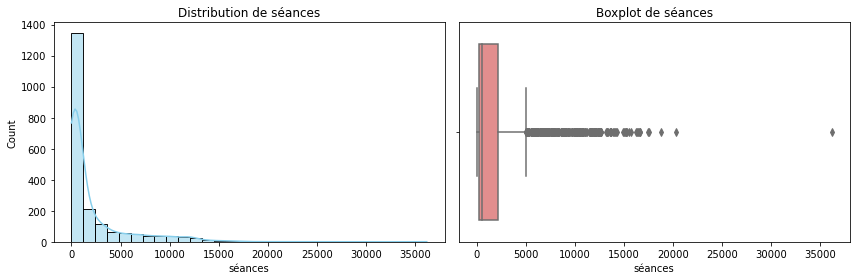

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1
La valeur maximum est  :  36212
La moyenne de cette variable est :  2069.6932876041155
Ecart-type :  3397.9614996259475 . 
 C'est à dire que les valeurs sont écarté d'environ 3397.9614996259475 autour de la moyenne
Q1  209.0 
 C'est à dire que 25% des valeurs sont inférieur à 209.0.
Q2 :  511.0 
 C'est à dire que 50% des valeurs sont inférieur à 511.0.
Q3:  2143.0 
 C'est à dire que 75% des valeurs sont inférieur à 2143.0.
Ecart interquartile : 1934.0 
 C'est à dire que 50% des valeurs sont comprise entre 209.0 et 2143.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  9.0
5%  42.0
95%  10237.0
99%  14200.799999999994

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de séances : 2.587
Distribution très asymétrique à droite. Une transformation log peut être envis

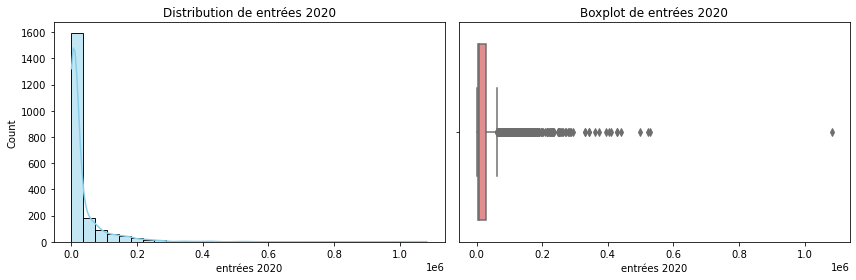

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  1082659
La moyenne de cette variable est :  31944.931896129347
Ecart-type :  62352.50095911656 . 
 C'est à dire que les valeurs sont écarté d'environ 62352.50095911656 autour de la moyenne
Q1  3747.0 
 C'est à dire que 25% des valeurs sont inférieur à 3747.0.
Q2 :  8612.0 
 C'est à dire que 50% des valeurs sont inférieur à 8612.0.
Q3:  27523.0 
 C'est à dire que 75% des valeurs sont inférieur à 27523.0.
Ecart interquartile : 23776.0 
 C'est à dire que 50% des valeurs sont comprise entre 3747.0 et 27523.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  390.0
5%  1204.0
95%  152244.0
99%  275759.5999999997

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de entrées 2020 : 5.236
Distribution très asymétrique à droite. Une transformation l

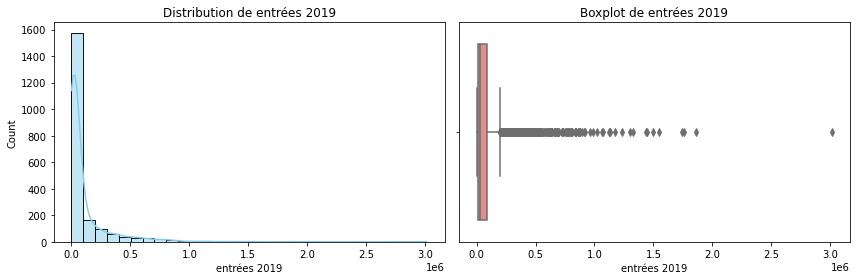

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  3012613
La moyenne de cette variable est :  104241.3704066634
Ecart-type :  208097.5150413887 . 
 C'est à dire que les valeurs sont écarté d'environ 208097.5150413887 autour de la moyenne
Q1  11031.0 
 C'est à dire que 25% des valeurs sont inférieur à 11031.0.
Q2 :  26414.0 
 C'est à dire que 50% des valeurs sont inférieur à 26414.0.
Q3:  85435.0 
 C'est à dire que 75% des valeurs sont inférieur à 85435.0.
Ecart interquartile : 74404.0 
 C'est à dire que 50% des valeurs sont comprise entre 11031.0 et 85435.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1148.8
5%  3428.0
95%  524903.0
99%  915071.9999999998

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de entrées 2019 : 4.509
Distribution très asymétrique à droite. Une transformat

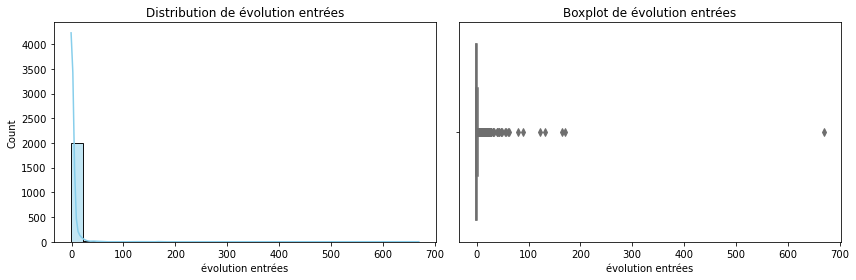

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  -1.0
La valeur maximum est  :  669.6
La moyenne de cette variable est :  1.6975703477719244
Ecart-type :  17.247105482253435 . 
 C'est à dire que les valeurs sont écarté d'environ 17.247105482253435 autour de la moyenne
Q1  -0.915517976 
 C'est à dire que 25% des valeurs sont inférieur à -0.915517976.
Q2 :  -0.6494152125 
 C'est à dire que 50% des valeurs sont inférieur à -0.6494152125.
Q3:  0.233556299 
 C'est à dire que 75% des valeurs sont inférieur à 0.233556299.
Ecart interquartile : 1.149074275 
 C'est à dire que 50% des valeurs sont comprise entre -0.915517976 et 0.233556299.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  -0.9979299537999999
5%  -0.990584493
95%  9.78948267
99%  31.783769487999987

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de évoluti

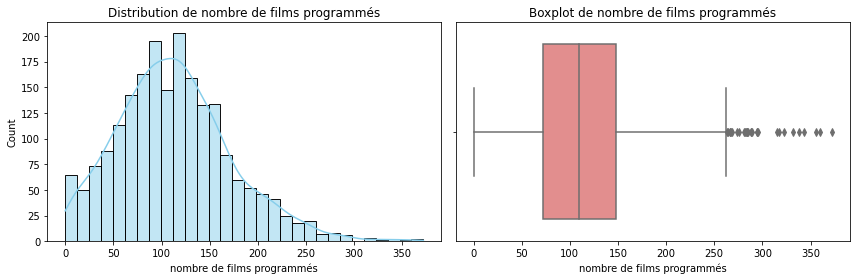

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  372
La moyenne de cette variable est :  113.40715335619794
Ecart-type :  59.06892225405328 . 
 C'est à dire que les valeurs sont écarté d'environ 59.06892225405328 autour de la moyenne
Q1  72.0 
 C'est à dire que 25% des valeurs sont inférieur à 72.0.
Q2 :  110.0 
 C'est à dire que 50% des valeurs sont inférieur à 110.0.
Q3:  148.0 
 C'est à dire que 75% des valeurs sont inférieur à 148.0.
Ecart interquartile : 76.0 
 C'est à dire que 50% des valeurs sont comprise entre 72.0 et 148.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  5.0
5%  22.0
95%  220.0
99%  278.99999999999955

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de nombre de films programmés : 0.585
Distribution modérément asymétrique.
29 valeurs aberrantes détectées pour

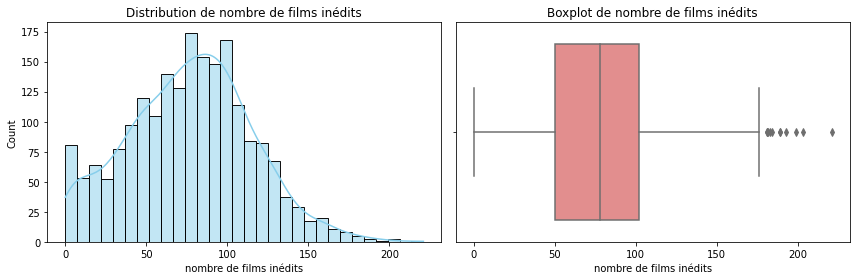

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  221
La moyenne de cette variable est :  76.75110240078394
Ecart-type :  38.17720267294575 . 
 C'est à dire que les valeurs sont écarté d'environ 38.17720267294575 autour de la moyenne
Q1  50.0 
 C'est à dire que 25% des valeurs sont inférieur à 50.0.
Q2 :  78.0 
 C'est à dire que 50% des valeurs sont inférieur à 78.0.
Q3:  102.0 
 C'est à dire que 75% des valeurs sont inférieur à 102.0.
Ecart interquartile : 52.0 
 C'est à dire que 50% des valeurs sont comprise entre 50.0 et 102.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  10.0
95%  139.0
99%  166.5999999999999

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de nombre de films inédits : 0.091
Distribution assez symétrique.
11 valeurs aberrantes détectées pour nombre de fi

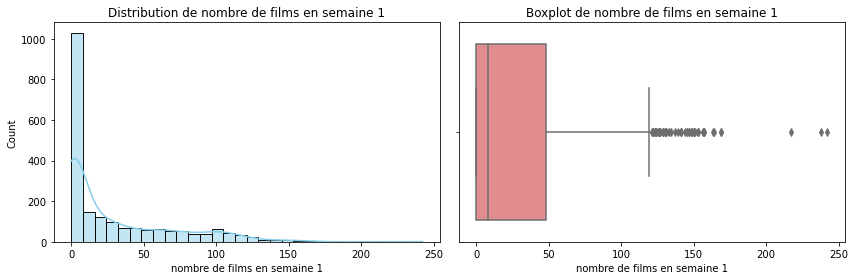

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  242
La moyenne de cette variable est :  28.935325820676137
Ecart-type :  39.05893901734837 . 
 C'est à dire que les valeurs sont écarté d'environ 39.05893901734837 autour de la moyenne
Q1  0.0 
 C'est à dire que 25% des valeurs sont inférieur à 0.0.
Q2 :  8.0 
 C'est à dire que 50% des valeurs sont inférieur à 8.0.
Q3:  48.0 
 C'est à dire que 75% des valeurs sont inférieur à 48.0.
Ecart interquartile : 48.0 
 C'est à dire que 50% des valeurs sont comprise entre 0.0 et 48.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  110.0
99%  147.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de nombre de films en semaine 1 : 1.458
Distribution très asymétrique à droite. Une transformation log peut être envisagée.
61 valeurs 

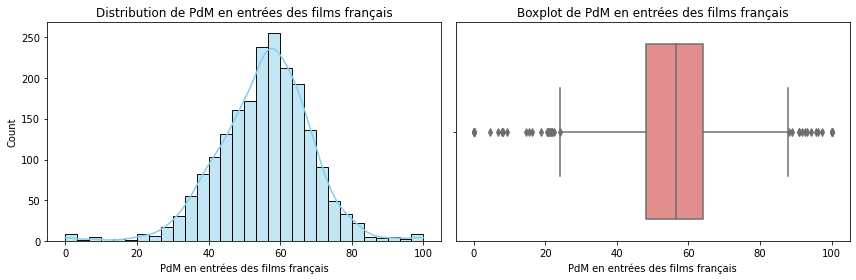

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  55.680045418300786
Ecart-type :  13.06786914347076 . 
 C'est à dire que les valeurs sont écarté d'environ 13.06786914347076 autour de la moyenne
Q1  48.03956199 
 C'est à dire que 25% des valeurs sont inférieur à 48.03956199.
Q2 :  56.62241238 
 C'est à dire que 50% des valeurs sont inférieur à 56.62241238.
Q3:  64.0094247 
 C'est à dire que 75% des valeurs sont inférieur à 64.0094247.
Ecart interquartile : 15.969862709999994 
 C'est à dire que 50% des valeurs sont comprise entre 48.03956199 et 64.0094247.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  20.836960886
5%  34.71273019
95%  75.01629372
99%  86.6154080199999

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des fil

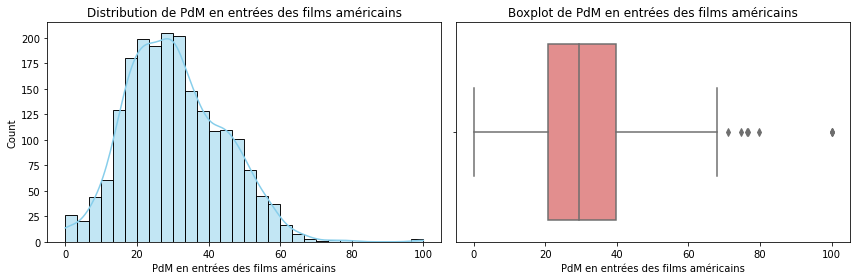

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  30.77739530902786
Ecart-type :  13.62032439182199 . 
 C'est à dire que les valeurs sont écarté d'environ 13.62032439182199 autour de la moyenne
Q1  20.83550914 
 C'est à dire que 25% des valeurs sont inférieur à 20.83550914.
Q2 :  29.46193403 
 C'est à dire que 50% des valeurs sont inférieur à 29.46193403.
Q3:  39.87344739 
 C'est à dire que 75% des valeurs sont inférieur à 39.87344739.
Ecart interquartile : 19.037938250000003 
 C'est à dire que 50% des valeurs sont comprise entre 20.83550914 et 39.87344739.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.3272727272000017
5%  10.74633578
95%  54.06437534
99%  63.121310503999986

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entré

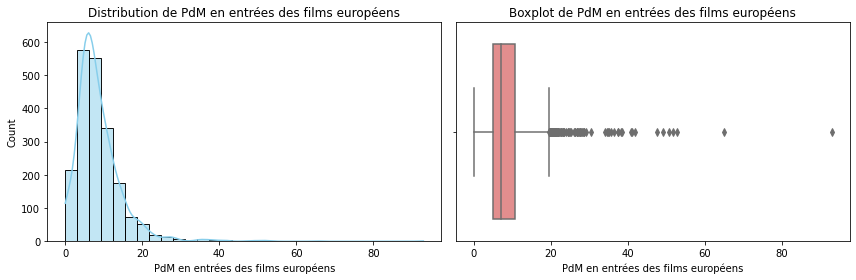

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  92.95933735
La moyenne de cette variable est :  8.562726065184716
Ecart-type :  6.273722362819384 . 
 C'est à dire que les valeurs sont écarté d'environ 6.273722362819384 autour de la moyenne
Q1  4.938271605 
 C'est à dire que 25% des valeurs sont inférieur à 4.938271605.
Q2 :  7.240745135 
 C'est à dire que 50% des valeurs sont inférieur à 7.240745135.
Q3:  10.84313335 
 C'est à dire que 75% des valeurs sont inférieur à 10.84313335.
Ecart interquartile : 5.904861745000001 
 C'est à dire que 50% des valeurs sont comprise entre 4.938271605 et 10.84313335.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  1.383399209
95%  19.06438205
99%  30.00456416199988

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des film

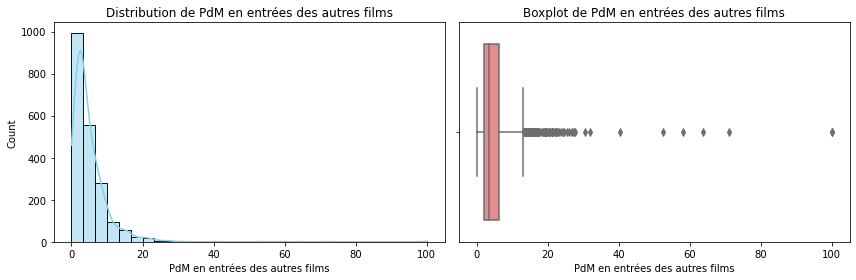

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  4.9766574328569275
Ecart-type :  5.907984840437188 . 
 C'est à dire que les valeurs sont écarté d'environ 5.907984840437188 autour de la moyenne
Q1  1.957585644 
 C'est à dire que 25% des valeurs sont inférieur à 1.957585644.
Q2 :  3.434030467 
 C'est à dire que 50% des valeurs sont inférieur à 3.434030467.
Q3:  6.436843523 
 C'est à dire que 75% des valeurs sont inférieur à 6.436843523.
Ecart interquartile : 4.479257879 
 C'est à dire que 50% des valeurs sont comprise entre 1.957585644 et 6.436843523.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  14.1097999
99%  22.504427719999978

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des autres films : 6.697
Di

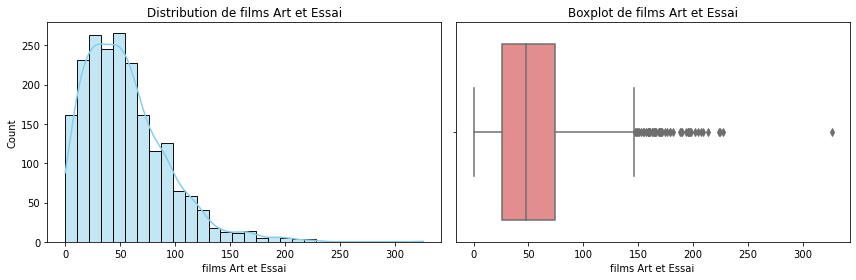

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  326
La moyenne de cette variable est :  54.51690347868692
Ecart-type :  37.93837667740488 . 
 C'est à dire que les valeurs sont écarté d'environ 37.93837667740488 autour de la moyenne
Q1  26.0 
 C'est à dire que 25% des valeurs sont inférieur à 26.0.
Q2 :  48.0 
 C'est à dire que 50% des valeurs sont inférieur à 48.0.
Q3:  74.0 
 C'est à dire que 75% des valeurs sont inférieur à 74.0.
Ecart interquartile : 48.0 
 C'est à dire que 50% des valeurs sont comprise entre 26.0 et 74.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.40000000000000213
5%  7.0
95%  122.0
99%  177.79999999999973

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de films Art et Essai : 1.272
Distribution très asymétrique à droite. Une transformation log peut être

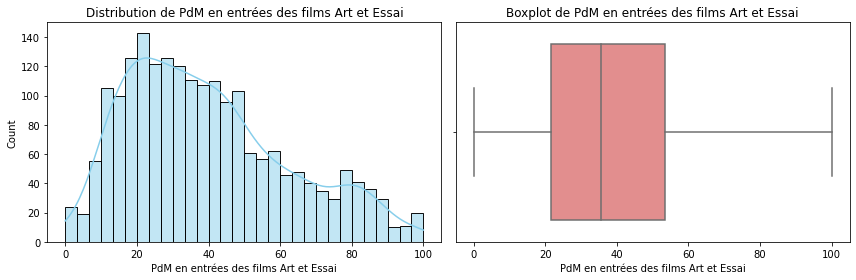

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  39.72052891264481
Ecart-type :  22.609434568090958 . 
 C'est à dire que les valeurs sont écarté d'environ 22.609434568090958 autour de la moyenne
Q1  21.71500366 
 C'est à dire que 25% des valeurs sont inférieur à 21.71500366.
Q2 :  35.72687225 
 C'est à dire que 50% des valeurs sont inférieur à 35.72687225.
Q3:  53.4505265 
 C'est à dire que 75% des valeurs sont inférieur à 53.4505265.
Ecart interquartile : 31.73552284 
 C'est à dire que 50% des valeurs sont comprise entre 21.71500366 et 53.4505265.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1.4736516158000004
5%  10.14687136
95%  83.63735276
99%  95.66933310999995

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des fi

In [18]:
var_tranfo=[]
for v in var_quanti:
    data_var=data[v]
    var_tranfo=analyse_quanti(data_var,v,var_tranfo)

De manière général, on remarque que sur toutes nos variables quantitatives, nous possédons beaucoup de caractéristique avec des valeurs aberrantes. La création de ces valeurs abérrantes sont majoritairement dues à une asymétrie de la distribution de notre variable (asymétrie à gauche pour la plupart). C'est à dire que la concentration de nos observations vers de valeurs faibles fait que les valeurs hautes peuvent biaisé l'interprétation de certain indicateur (comme la moyenne) ou les résultats de notre modèle.

Pour corriger ces valeurs abérrantes, nous essayer d'appliquer une transformation logarithmes sur nos variables. Nous devrons corriger les variables suivantes :

In [19]:
for i in var_tranfo:
    print(i)

population de la commune
écrans
fauteuils
semaines d'activité
séances
entrées 2020
entrées 2019
évolution entrées
nombre de films en semaine 1
PdM en entrées des films européens
PdM en entrées des autres films
films Art et Essai


In [ ]:
def analyse_quali(var,v):
    """
    Fonction qui permet d'analyser de manière univarié les variables quantitatives
    Param:
        var: series statistique de la variable étudiés
        v: nom de la variable
        lst_transo: liste des variables à transformer

    """
    print(f"########################## Analyse de {v} ##########################")
    effectifs =var.value_counts(dropna=False)
    
    # Table des fréquences
    freq = var.value_counts(normalize=True, dropna=False) * 100
    
    # Combinaison en un tableau
    tableau = pd.DataFrame({'Effectif': effectifs, 'Fréquence (%)': freq.round(2)})
    if tableau.iloc[0,0]!=1:
        print("-------------------------------------")
        print("TOP 10 des effectifs et des fréquences")
        print("-------------------------------------")
        print(tableau.head(10))

        print("-------------------------------------")
        print("Mode de la variable")
        print("-------------------------------------")
        print(f"Valeur la plus présentes dans la série: {tableau.index[0]}")

        
        # Graphique à barres
        plt.figure(figsize=(15,15))
        sns.countplot(x=var, order=effectifs.index, palette="Set2")
        plt.title(f"Diagramme en barres - {v}")
        plt.ylabel("Effectif")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print("Cette variable n'est pas analysable car propre pour chaque cinéma")


    

    print("#" * 70,'\n')

########################## Analyse de N° auto ##########################
Cette variable n'est pas analysable car propre pour chaque cinéma
###################################################################### 

########################## Analyse de nom ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                   Effectif  Fréquence (%)
REX                      33           1.62
MEGA CGR                 29           1.42
PATHE                    21           1.03
SALLE DES FETES          21           1.03
CASINO                   18           0.88
VOX                      17           0.83
SALLE POLYVALENTE        13           0.64
LE CLUB                  11           0.54
CINEVILLE                11           0.54
GAUMONT                  10           0.49
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: REX


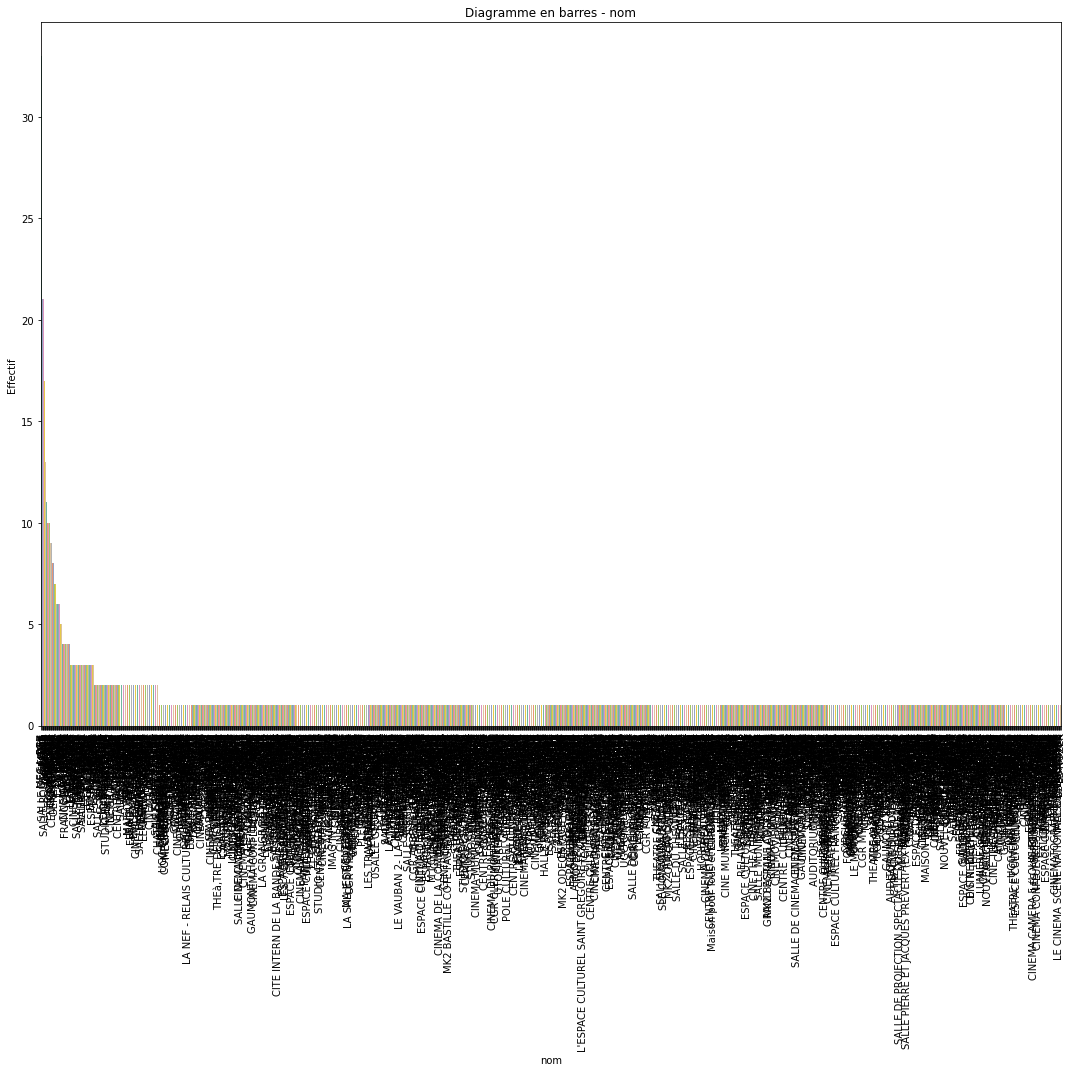

###################################################################### 

########################## Analyse de région administrative ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                            Effectif  Fréquence (%)
AUVERGNE / RHONE-ALPES           323          15.83
ILE-DE-FRANCE                    310          15.19
NOUVELLE AQUITAINE               228          11.17
OCCITANIE                        216          10.58
PROVENCE-ALPES-COTE D'AZUR       194           9.51
PAYS DE LA LOIRE                 125           6.12
HAUTS DE FRANCE                  121           5.93
GRAND EST                        121           5.93
BRETAGNE                         121           5.93
NORMANDIE                        103           5.05
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: AUVERGNE / RHONE-ALPES


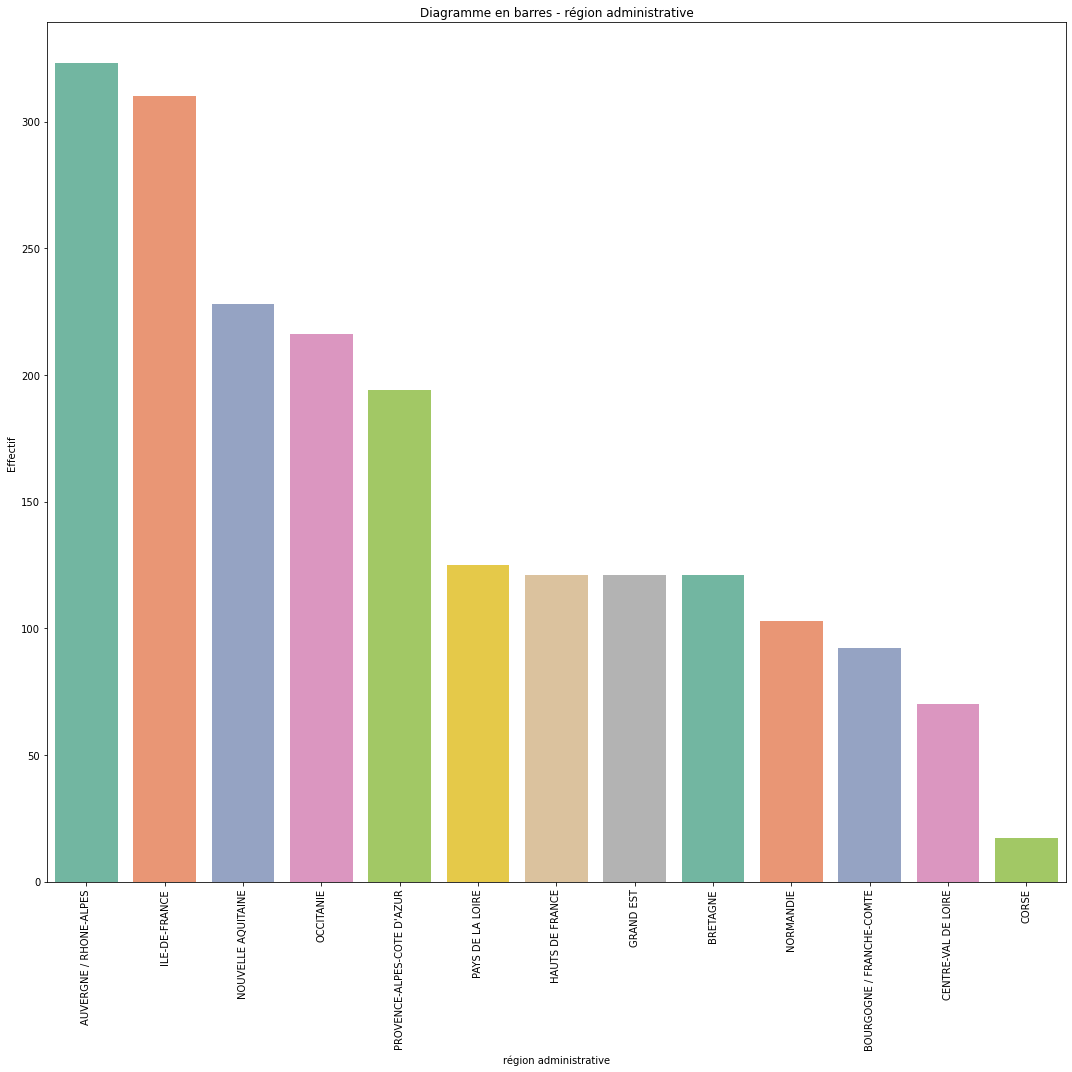

###################################################################### 

########################## Analyse de adresse ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                            Effectif  Fréquence (%)
SALLE DES FETES                   16           0.78
PLACE DE LA MAIRIE                 9           0.44
PLACE DU 8 MAI 1945                9           0.44
SALLE POLYVALENTE                  9           0.44
RUE DES ECOLES                     6           0.29
PLACE DE L HOTEL DE VILLE          6           0.29
PLACE CHARLES DE GAULLE            6           0.29
PLACE DU GENERAL DE GAULLE         6           0.29
PLACE DE LA LIBERATION             5           0.24
AVENUE DE LA GARE                  5           0.24
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: SALLE DES FETES


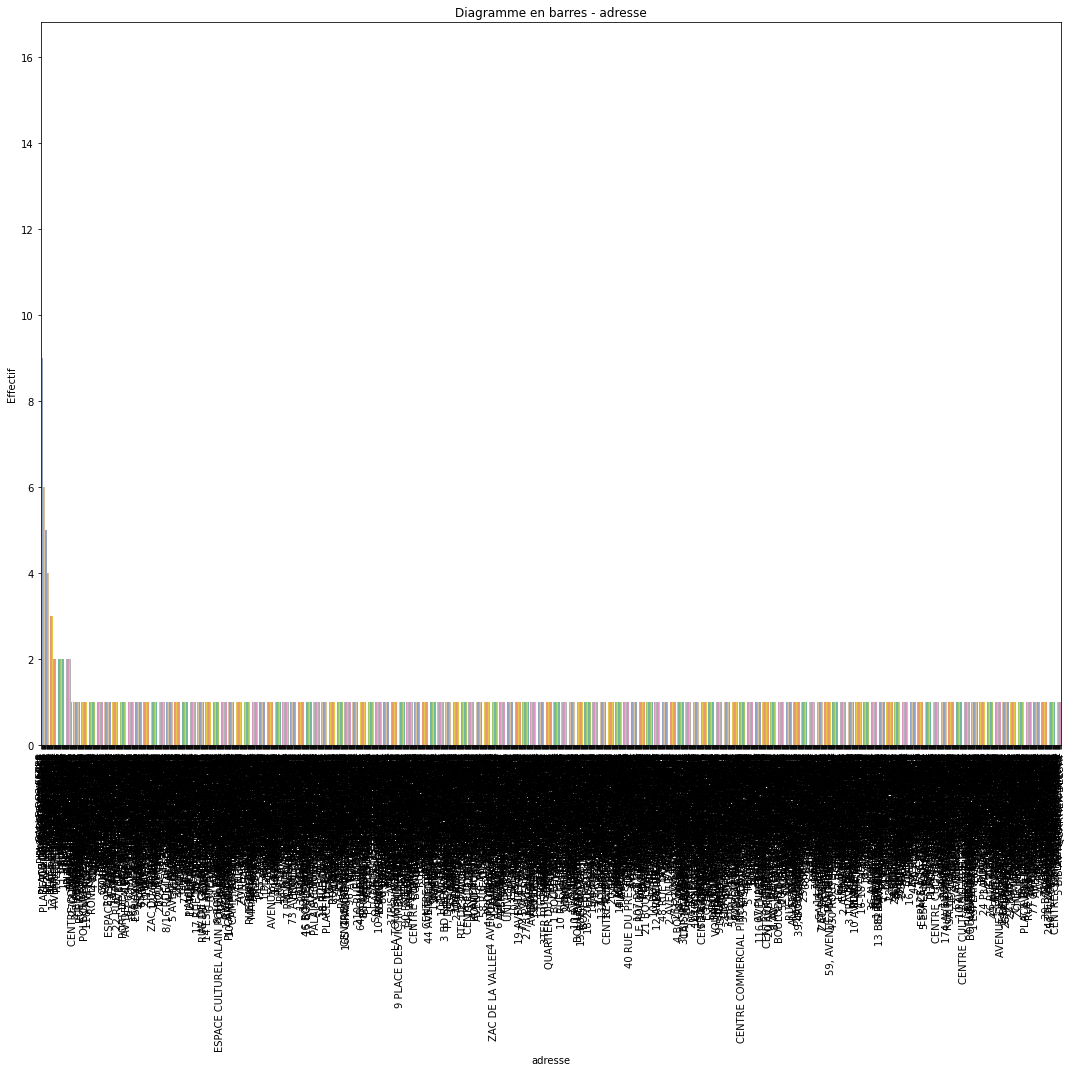

###################################################################### 

########################## Analyse de code INSEE ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
       Effectif  Fréquence (%)
69123        15           0.73
75106        15           0.73
13055        13           0.64
75105        10           0.49
6029          8           0.39
6088          7           0.34
75108         7           0.34
63113         6           0.29
75114         6           0.29
34172         6           0.29
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 69123


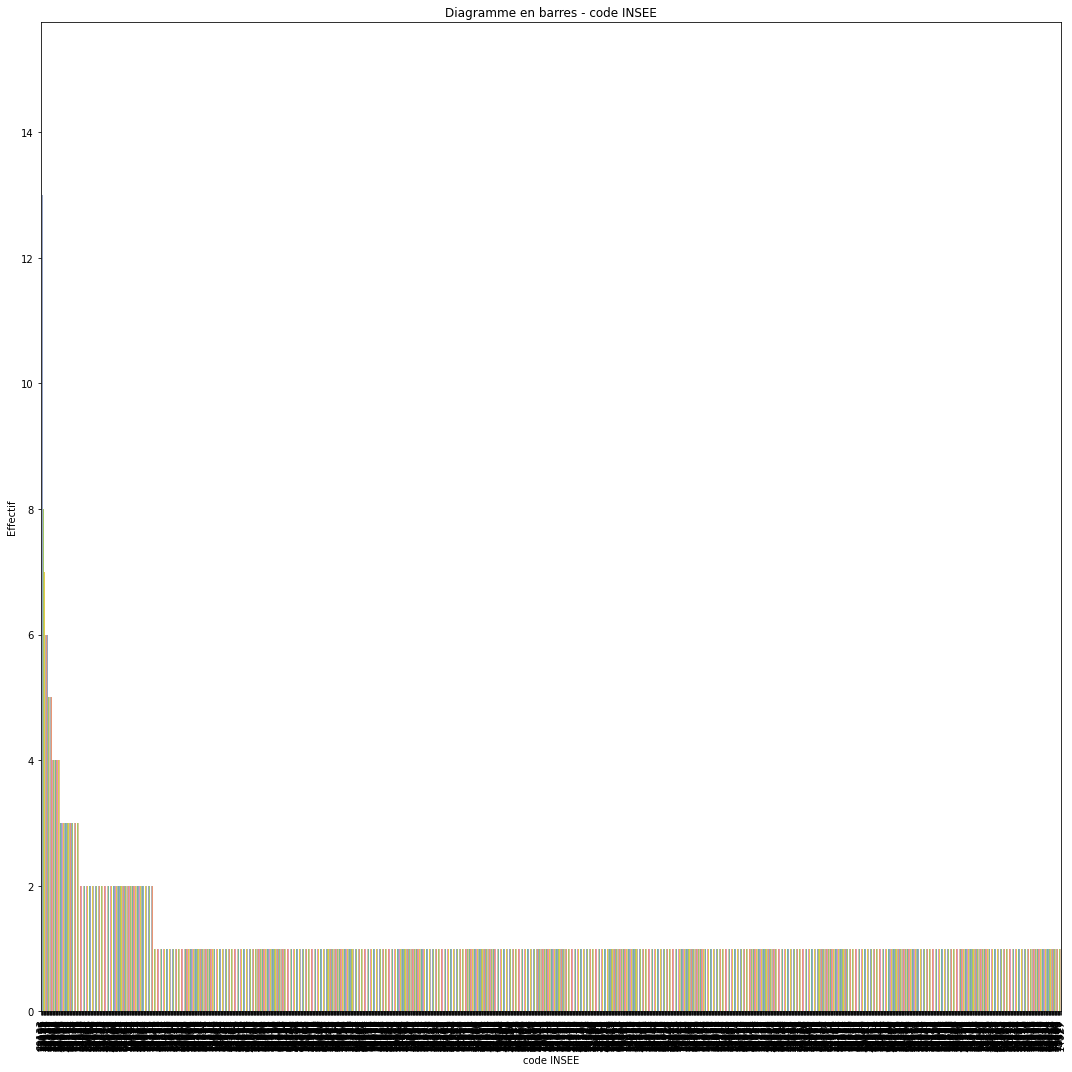

###################################################################### 

########################## Analyse de commune ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                          Effectif  Fréquence (%)
Lyon                            15           0.73
Paris 6e Arrondissement         15           0.73
Marseille                       13           0.64
Paris 5e Arrondissement         10           0.49
Cannes                           8           0.39
Nice                             7           0.34
Paris 8e Arrondissement          7           0.34
Paris 14e Arrondissement         6           0.29
Annecy                           6           0.29
Toulouse                         6           0.29
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: Lyon


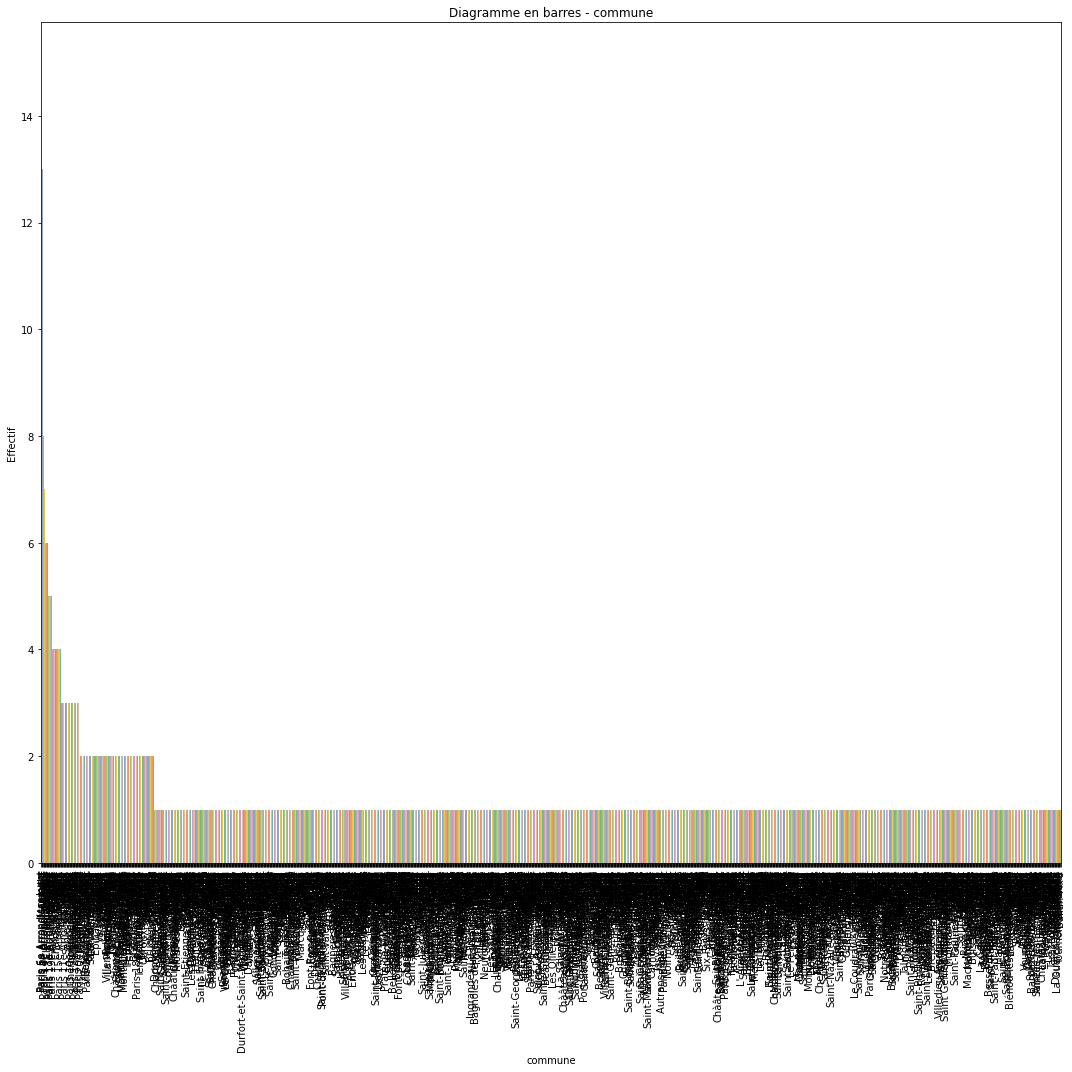

###################################################################### 

########################## Analyse de DEP ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
    Effectif  Fréquence (%)
75        78           3.82
13        55           2.69
69        51           2.50
44        49           2.40
38        47           2.30
73        47           2.30
33        46           2.25
59        46           2.25
35        44           2.16
6         42           2.06
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 75


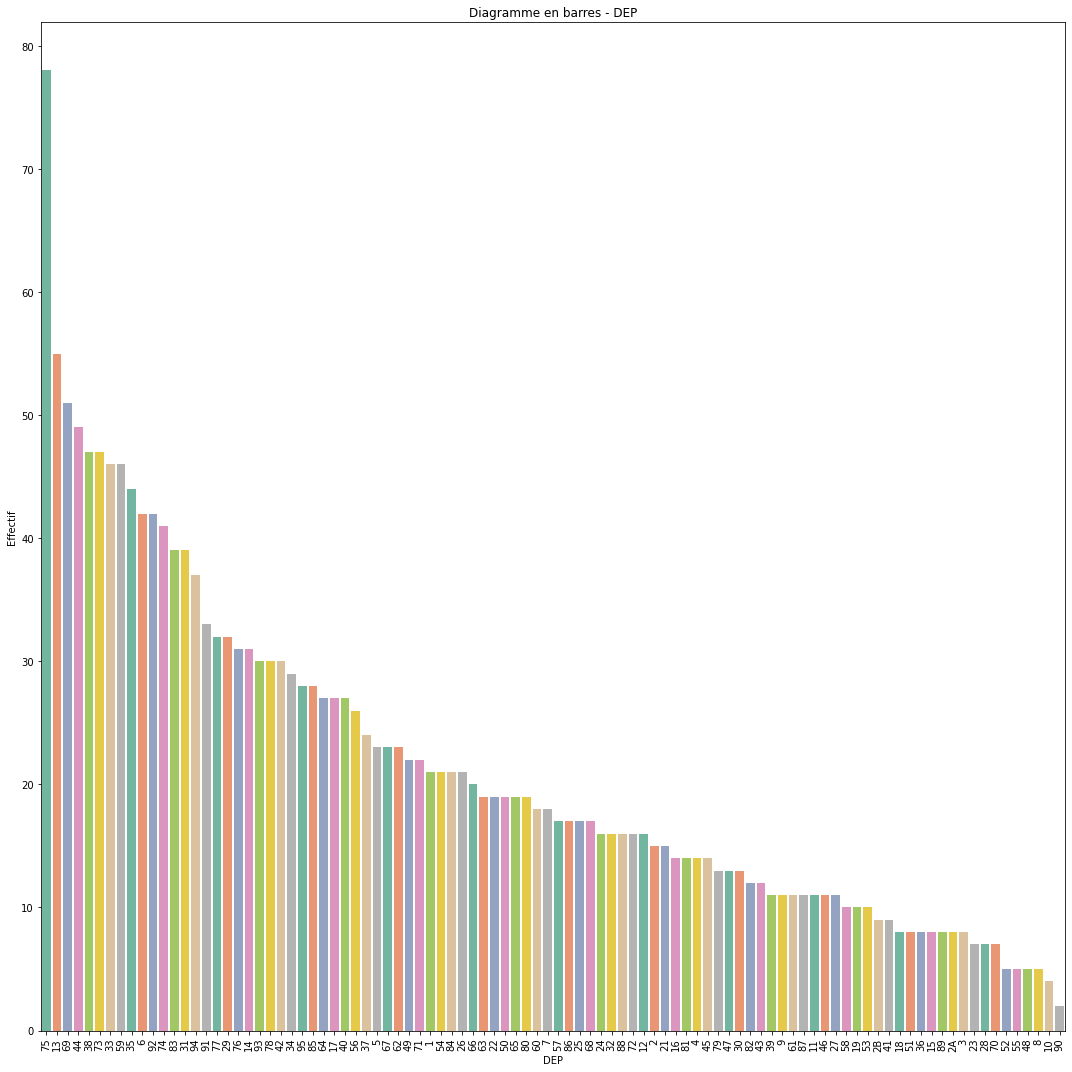

###################################################################### 

########################## Analyse de N°UU ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
       Effectif  Fréquence (%)
851         288          14.11
0           260          12.74
758          45           2.20
6701         35           1.71
759          34           1.67
31701        25           1.22
33701        19           0.93
59702        18           0.88
757          16           0.78
44701        15           0.73
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 851


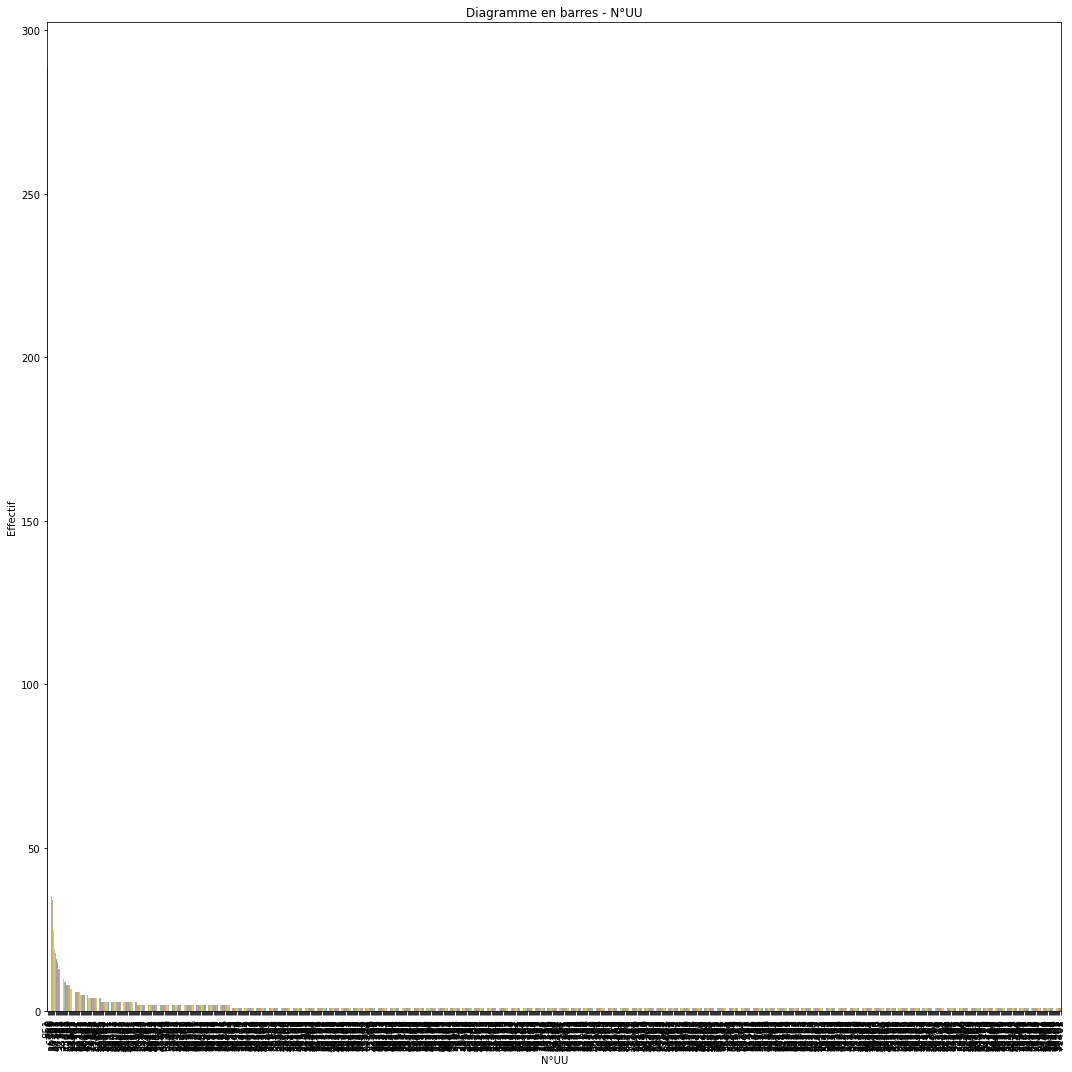

###################################################################### 

########################## Analyse de unité urbaine ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                             Effectif  Fréquence (%)
Paris                             288          14.11
Zone rurale                       260          12.74
Lyon                               45           2.20
Nice                               35           1.71
Marseille - Aix-en-Provence        34           1.67
Toulouse                           25           1.22
Bordeaux                           19           0.93
Lille (partie française)           18           0.88
Toulon                             16           0.78
Nantes                             15           0.73
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: Paris


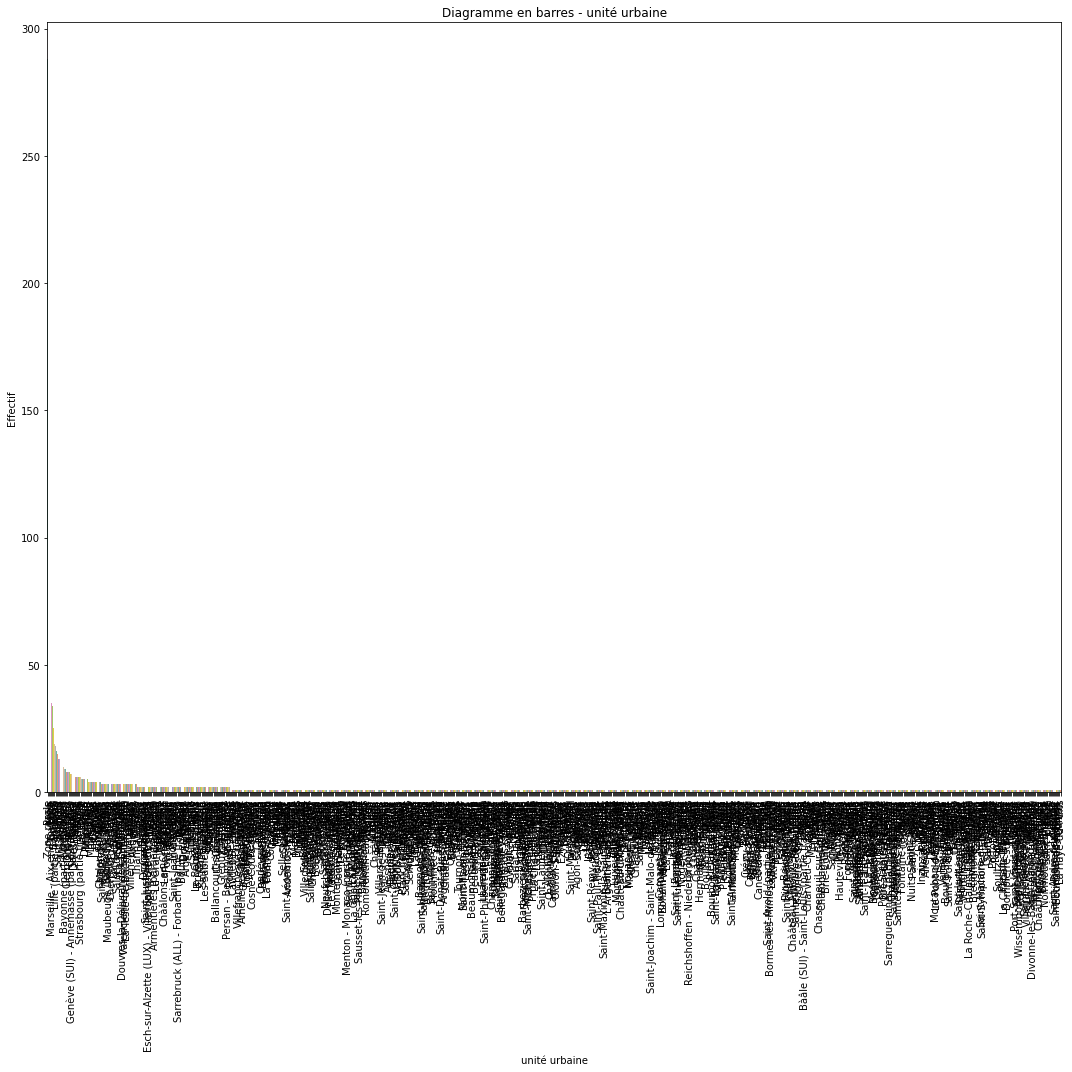

###################################################################### 

########################## Analyse de situation géographique ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                                              Effectif  Fréquence (%)
04-Unités urbaines de 100 000 hbts ou plus         721          35.33
06-autres communes et unités urbaines              712          34.88
05-Unités urbaines de 20 000 à  100 000 hbts       298          14.60
03-Petite couronne                                 123           6.03
02-Grande Couronne                                 109           5.34
01-Paris                                            78           3.82
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 04-Unités urbaines de 100 000 hbts ou plus


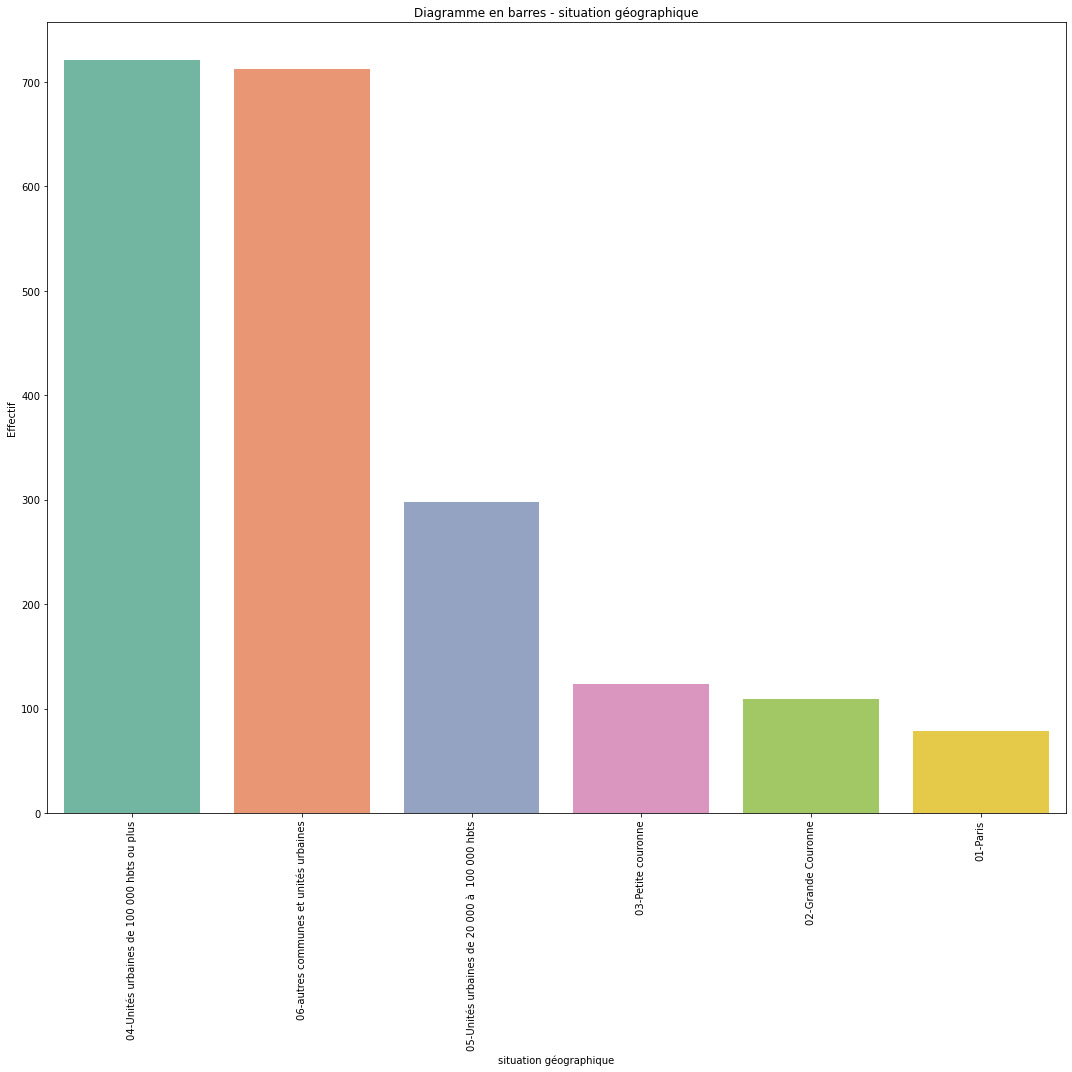

###################################################################### 

########################## Analyse de tranche d'entrées ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                           Effectif  Fréquence (%)
De 2 à  5 000 entrées           444          21.75
De 5 à  10 000 entrées          421          20.63
De 10 à  20 000 entrées         319          15.63
Moins de 2000 entrées           235          11.51
De 50 à  80 000 entrées         132           6.47
De 20 à  30 000 entrées         129           6.32
De 100 à  150 000 entrées        79           3.87
De 30 à  40 000 entrées          73           3.58
De 40 à  50 000 entrées          55           2.69
De 150 à  200 000 entrées        54           2.65
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: De 2 à  5 000 entrées


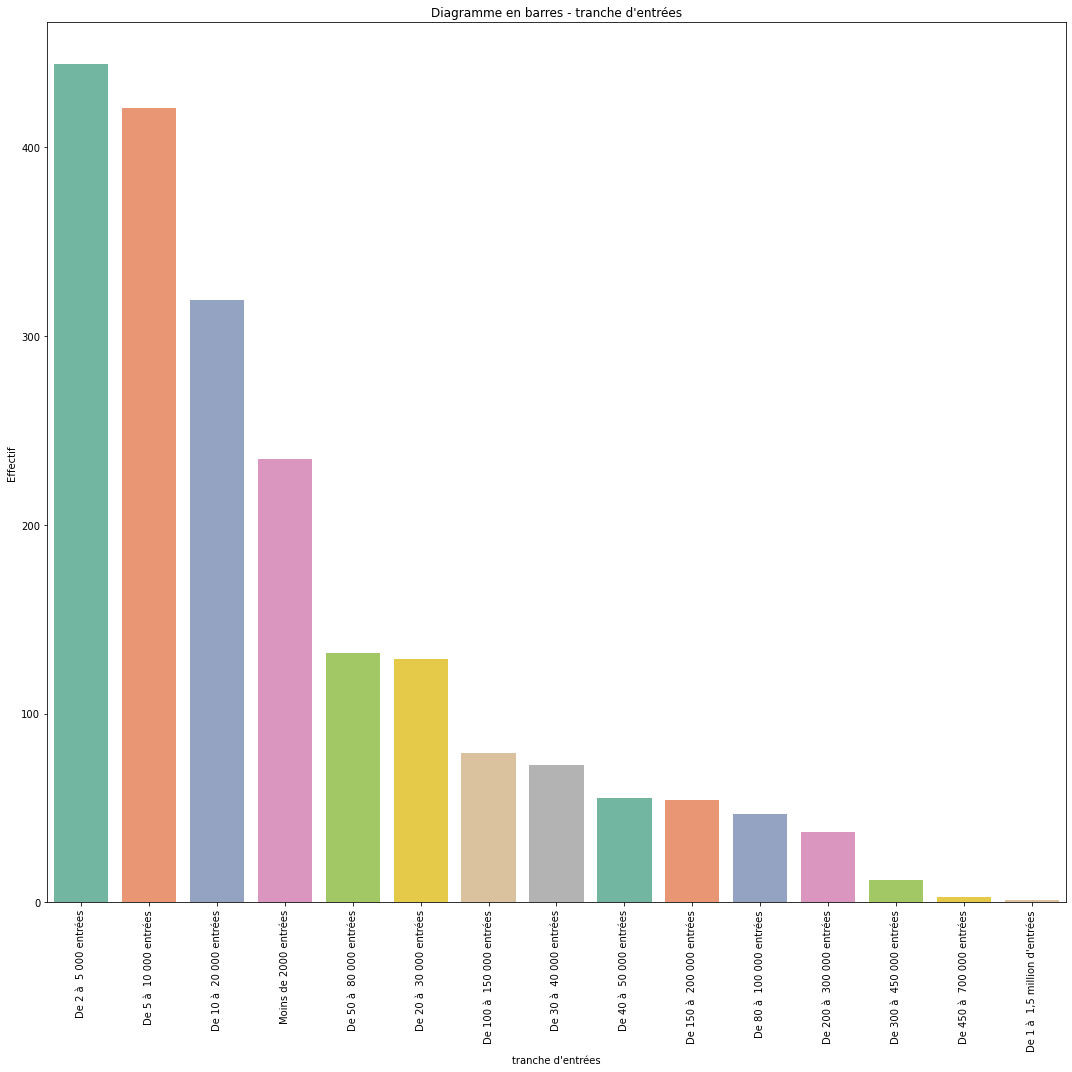

###################################################################### 

########################## Analyse de propriétaire ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                                                    Effectif  Fréquence (%)
GAUMONT                                                   22           1.08
UGC SAS                                                   18           0.88
UGC CINE CITE                                             15           0.73
ARTS ET TECHNIQUES                                        13           0.64
CINE-OFF                                                  13           0.64
ASSOCIATION CINEFOL 31                                    13           0.64
ASSOCIATION LE PARVIS SCENE NATIONALE TARBES PY...        12           0.59
UNION REG FEDERATIONS OEUVRES LAIQUES AUVERGNE ...        11           0.54
LE CINEMA DU SOLEIL                               

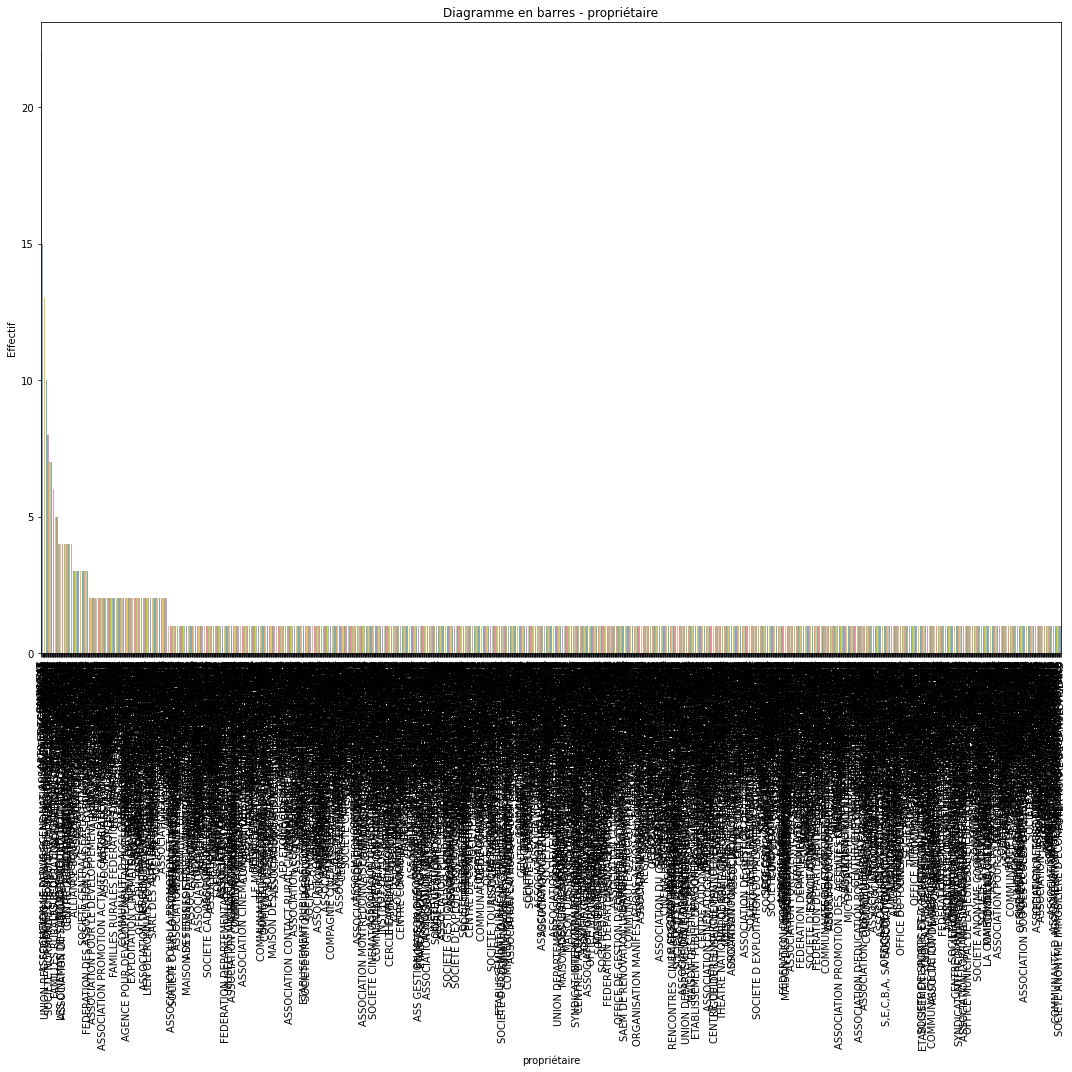

###################################################################### 

########################## Analyse de programmateur ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                                             Effectif  Fréquence (%)
SARL MULTICINES PYRENNEENS (Xavier-Menou)         856          41.94
SNC SAGEC - CINE 32 VEO                           252          12.35
SAS CINE DIFFUSION                                116           5.68
SARL MC4 DISTRIBUTION                             108           5.29
SARL GPCI                                         100           4.90
LES CINEMAS GAUMONT PATHE                          93           4.56
SARL LES FILMS DE LA ROCHELLE                      70           3.43
UGC DIFFUSION                                      60           2.94
SARL CINEODE                                       50           2.45
SARL MICROMEGAS DIFFUSION CINEMATOGRAPHIQUE

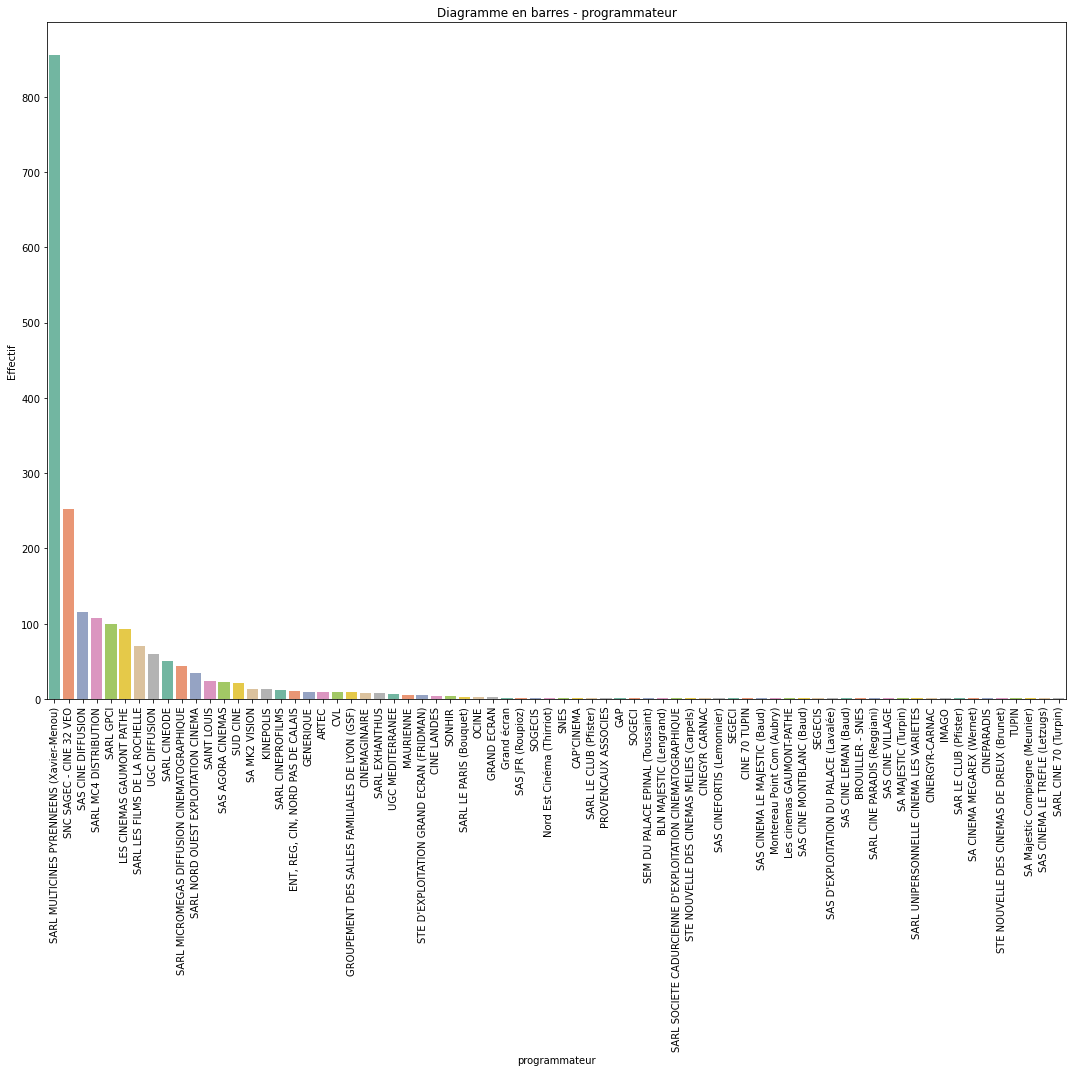

###################################################################### 

########################## Analyse de AE ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
     Effectif  Fréquence (%)
OUI      1237          60.61
NON       804          39.39
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: OUI


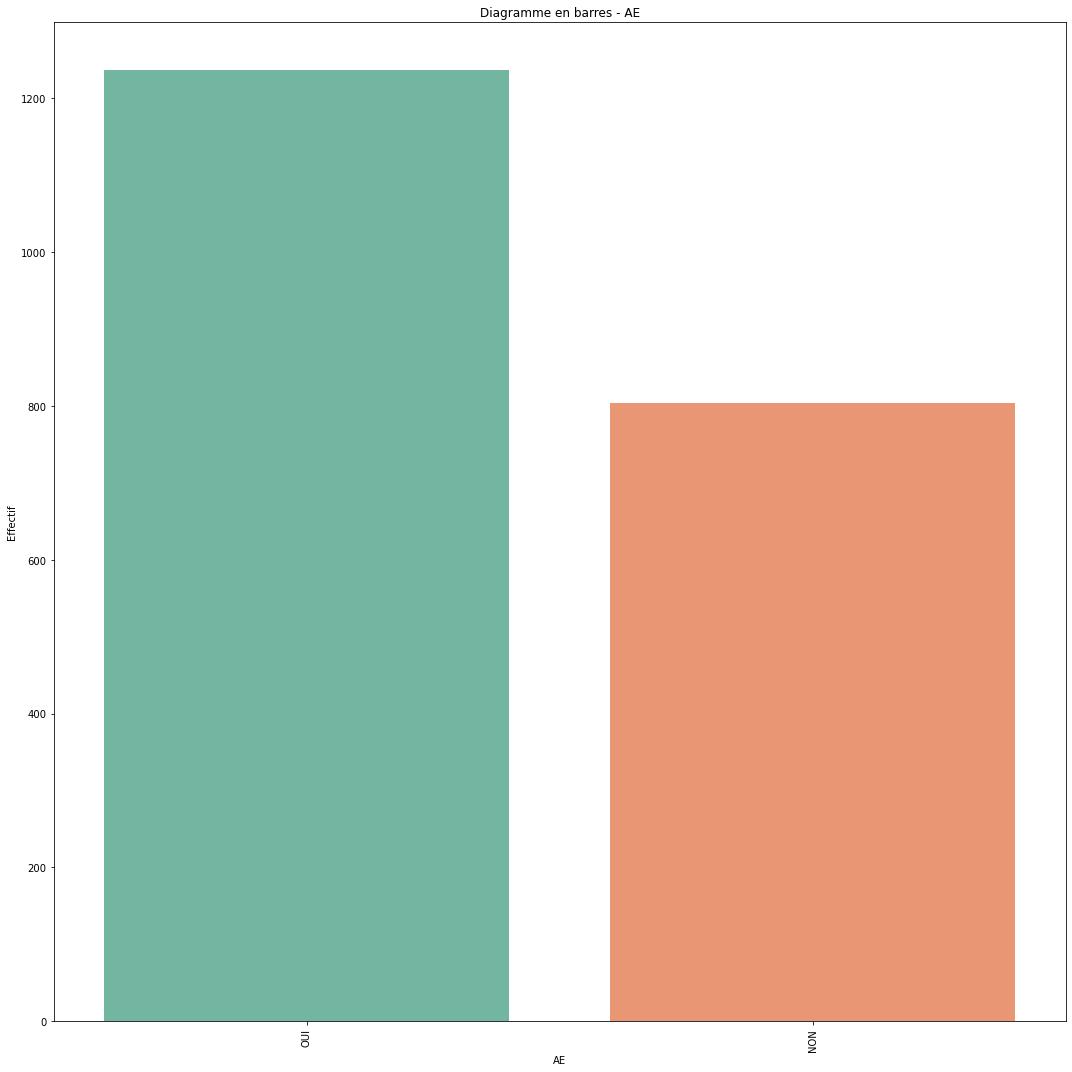

###################################################################### 

########################## Analyse de catégorie Art et Essai ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
     Effectif  Fréquence (%)
NON       804          39.39
E         662          32.44
C         250          12.25
D         206          10.09
A          94           4.61
B          25           1.22
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: NON


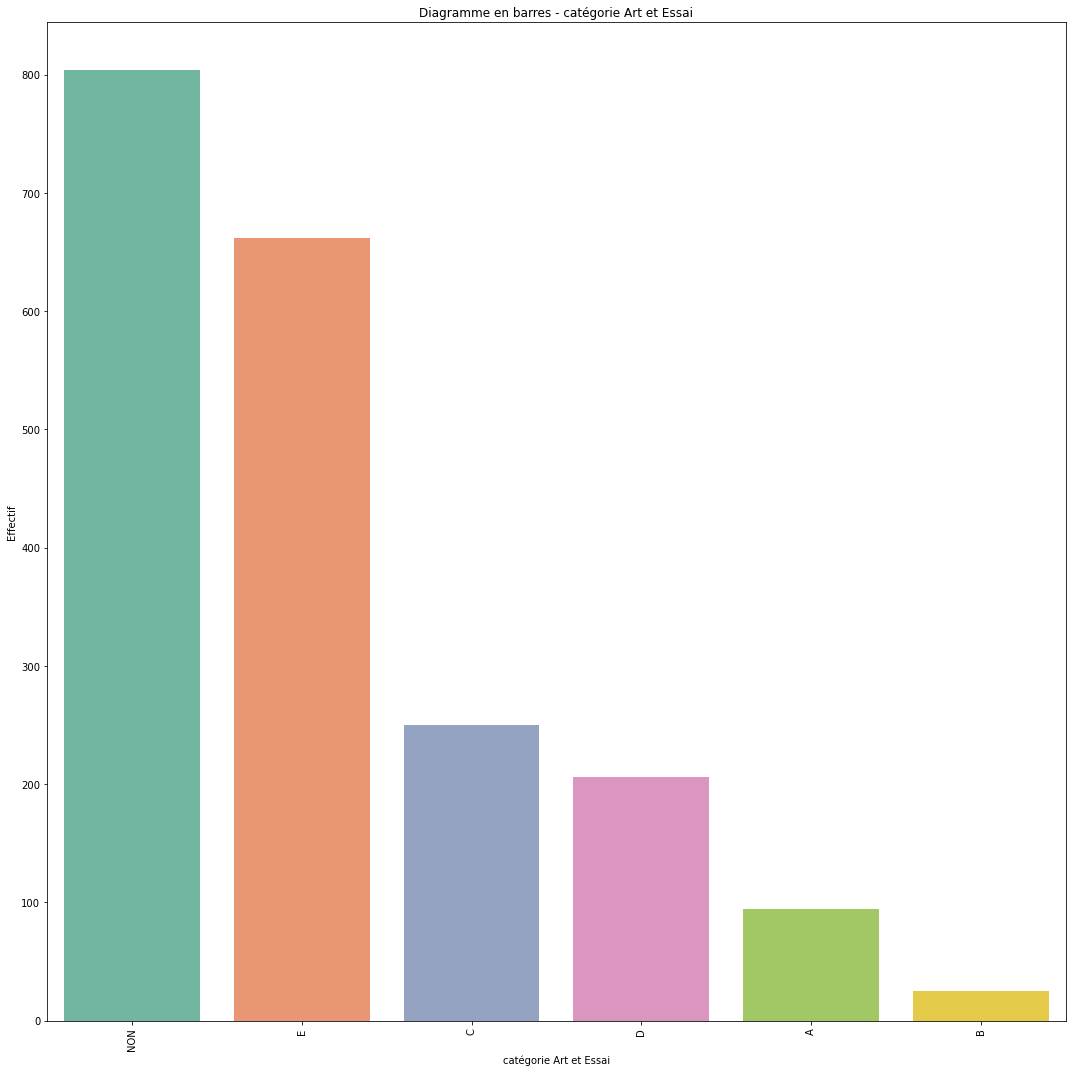

###################################################################### 

########################## Analyse de genre ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
           Effectif  Fréquence (%)
FIXE           1934          94.76
ITINERANT       107           5.24
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: FIXE


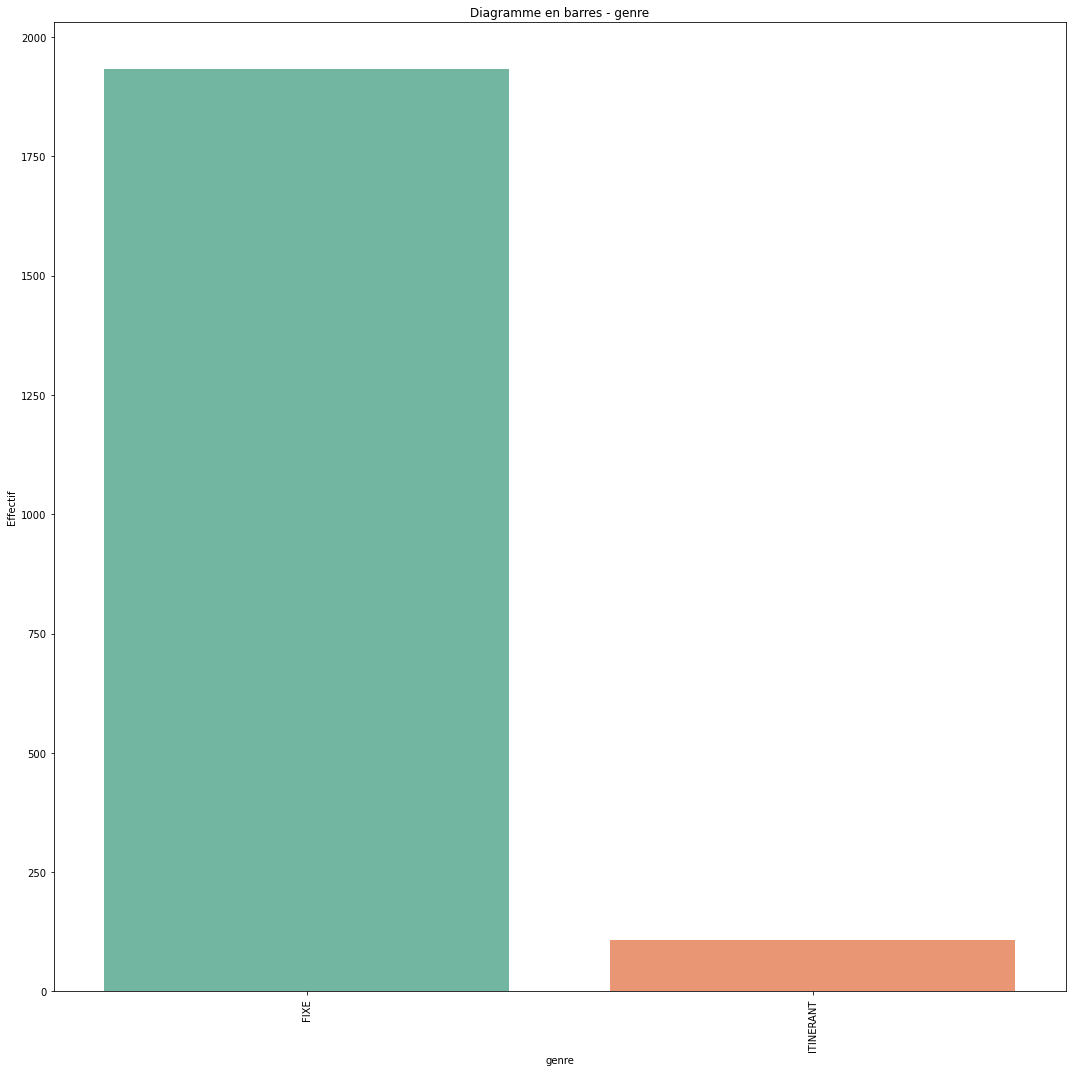

###################################################################### 

########################## Analyse de multiplexe ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
     Effectif  Fréquence (%)
NON      1808          88.58
OUI       233          11.42
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: NON


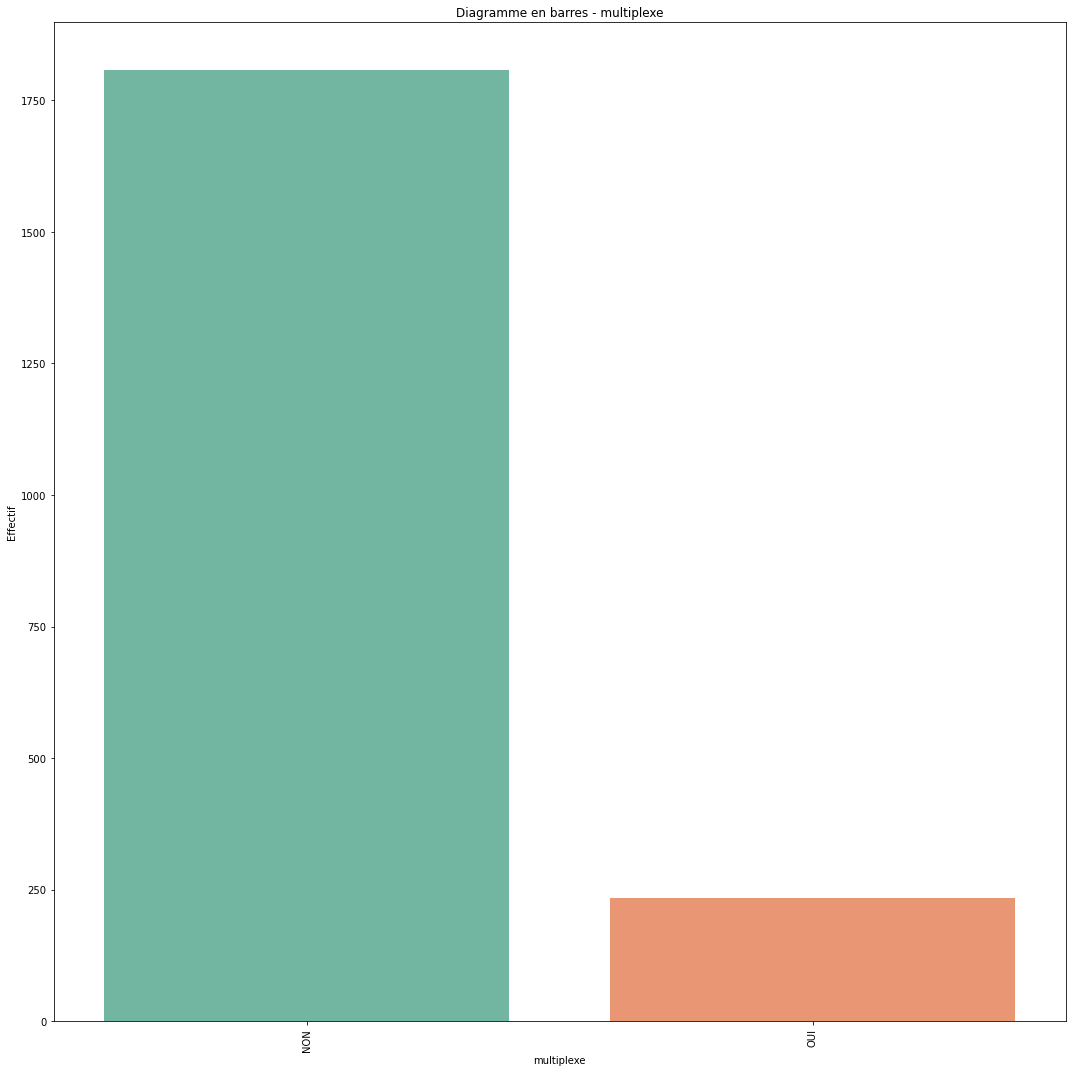

###################################################################### 

########################## Analyse de zone de la commune ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
   Effectif  Fréquence (%)
C       903          44.24
B       551          27.00
I       327          16.02
R       260          12.74
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: C


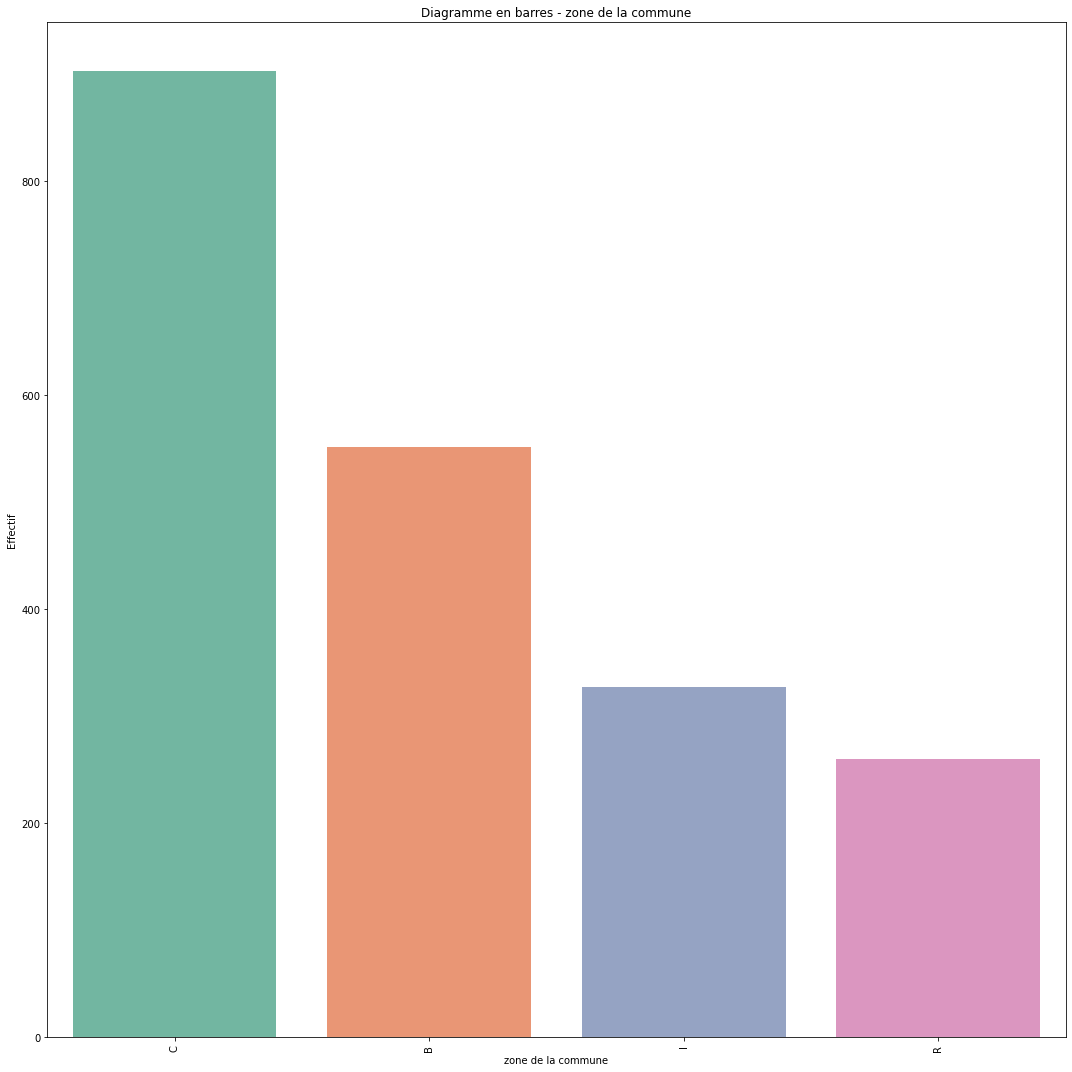

###################################################################### 

########################## Analyse de latitude ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
           Effectif  Fréquence (%)
51,033536         2           0.10
45,323346         2           0.10
43,552366         2           0.10
48,871363         2           0.10
44,900658         2           0.10
43,923796         2           0.10
48,847502         2           0.10
41,915976         2           0.10
43,750527         1           0.05
48,183726         1           0.05
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 51,033536


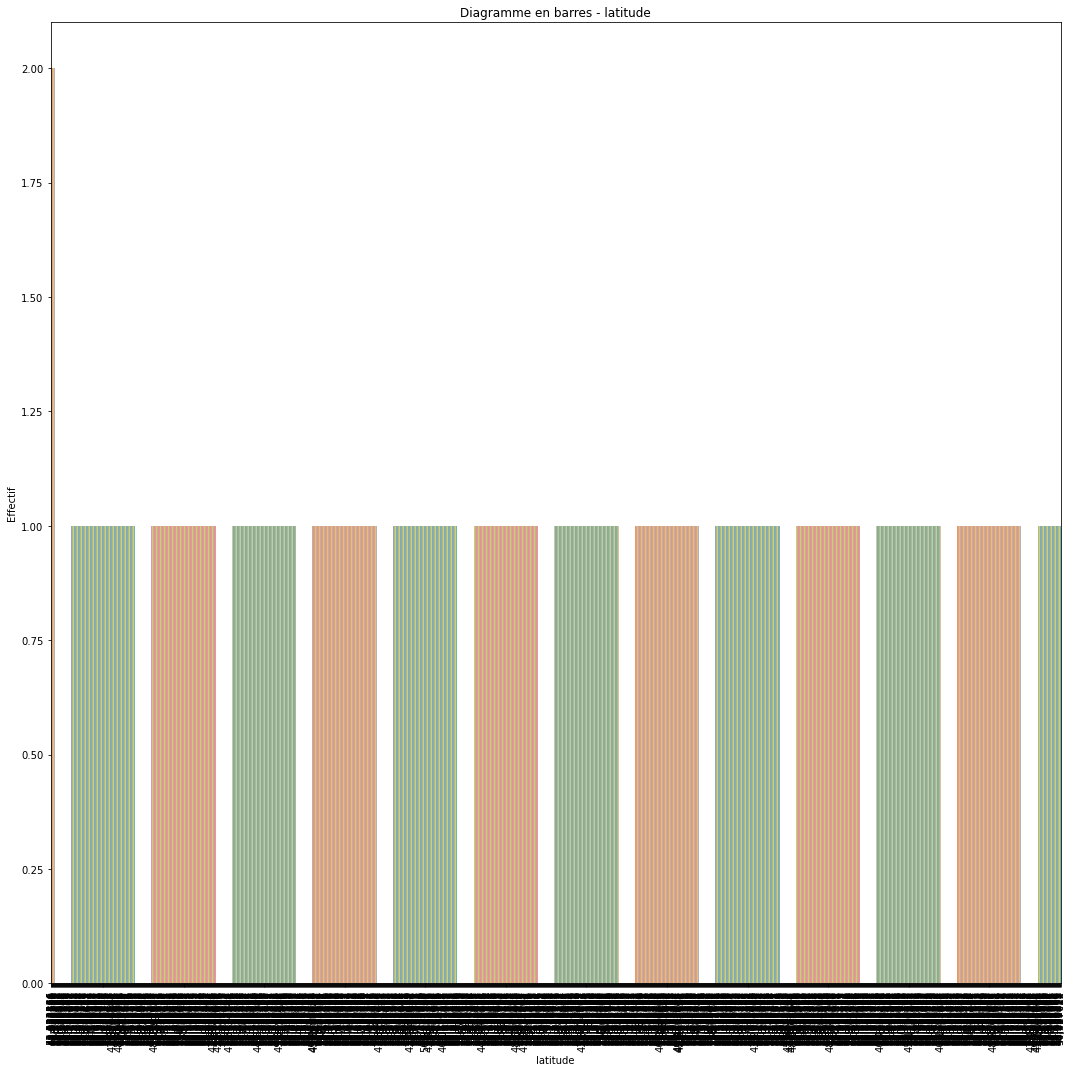

###################################################################### 

########################## Analyse de longitude ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
           Effectif  Fréquence (%)
6,538468          2           0.10
2,144604          2           0.10
2,342788          2           0.10
2,372294          2           0.10
7,016598          2           0.10
8,731036          2           0.10
-1,610628         1           0.05
0,120219          1           0.05
0,544345          1           0.05
7,564551          1           0.05
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 6,538468


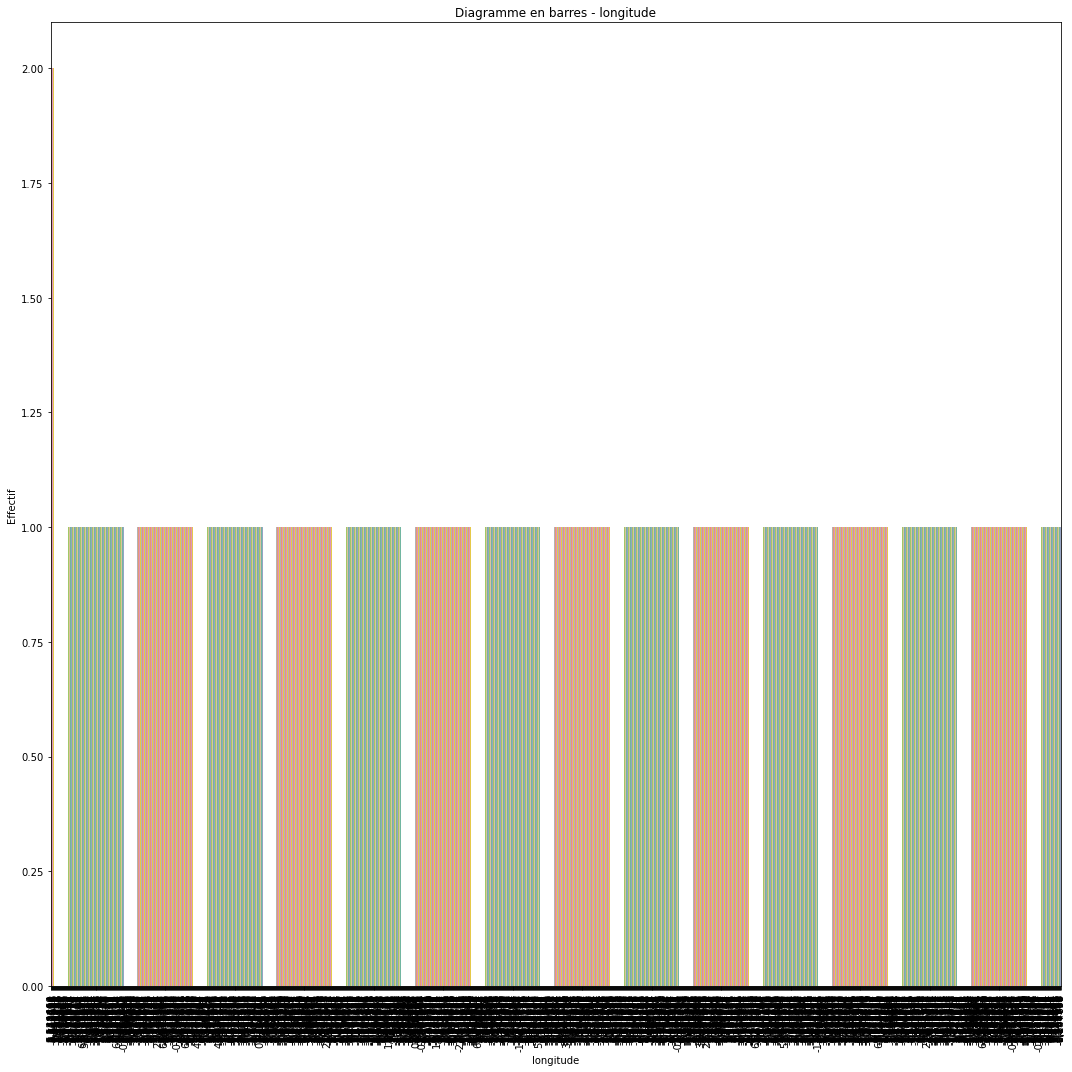

###################################################################### 

########################## Analyse de geolocalisation ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                     Effectif  Fréquence (%)
45,323346,6,538468          2           0.10
43,552366,7,016598          2           0.10
43,923796,2,144604          2           0.10
51,033536,2,372294          2           0.10
41,915976,8,731036          2           0.10
43,720217,2,323868          1           0.05
44,76726,6,010559           1           0.05
45,754303,6,417593          1           0.05
47,874121,-4,110036         1           0.05
47,555803,-2,484734         1           0.05
-------------------------------------
Mode de la variable
-------------------------------------
Modalité la plus important: 45,323346,6,538468


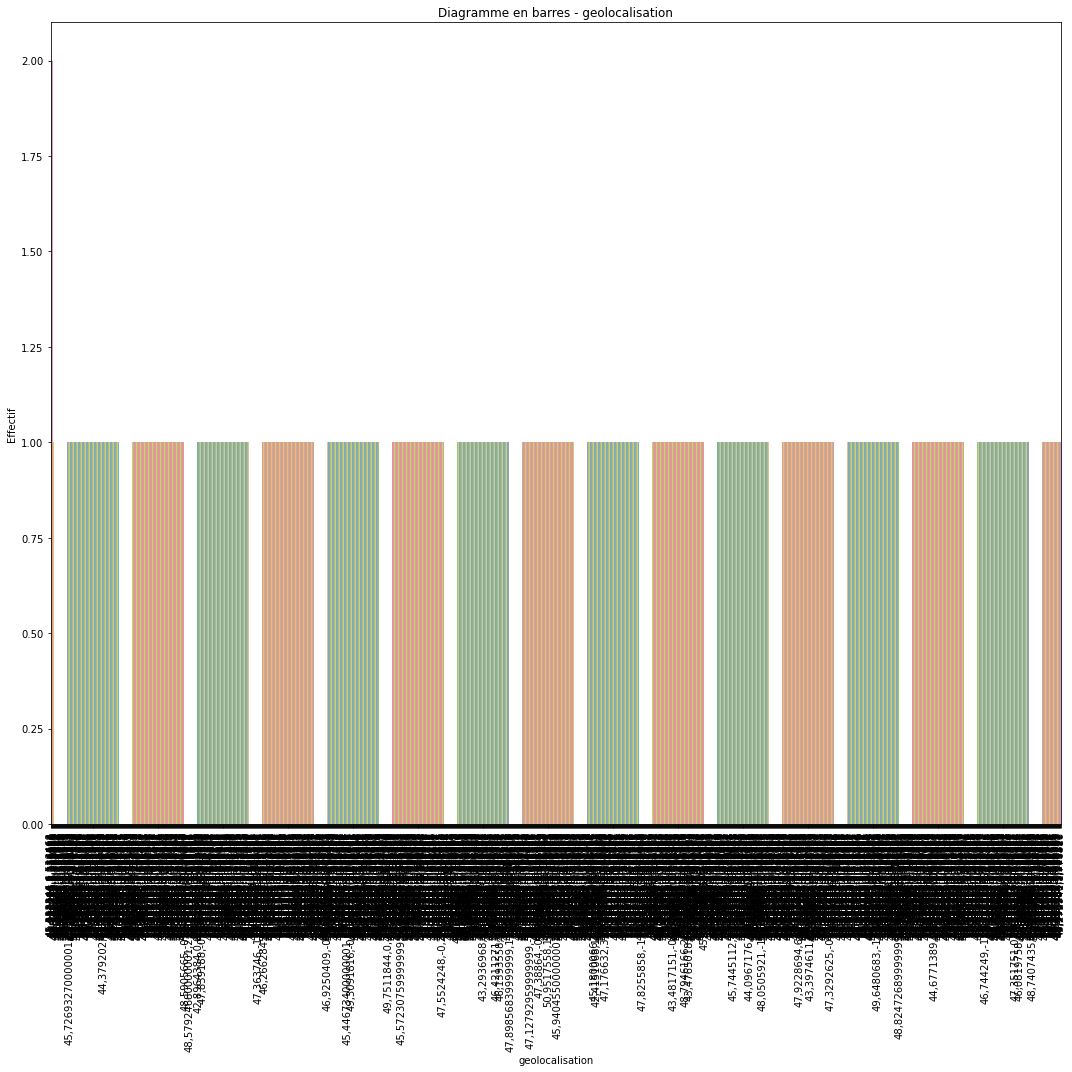

###################################################################### 



In [60]:
for quali in var_quali:
    v_qual=data[quali]
    analyse_quali(v_qual,quali)

#### Analyse bivariée

### Préparation à la modélisation

#### Tests statistiques

#### Sélection des variables

#### Encodage des variables

### Modélisation

#### Création du modèle

#### Evaluation du modèle

### Optimisation du modèle (si nécessaire)

#### Transformation des variables

#### Création du modèle

#### Evaluation du modèle